<h1 align="middle"> Lead Scoring Assignment </h1>

<h4 align="right"> By Shivani Raut, Shiwani Jamdagni, Shivam Banerjee </h4>

### PROBLEM STATEMENT
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Model Evaluation Libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [3]:
# Setting option to display all columns
pd.set_option("display.max_columns",None)

## IMPORT THE DATA

In [4]:
# Importing the data
leads_df = pd.read_csv("Leads.csv")

# # Display the first few rows of the DataFrame
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

## INSPECT AND UNDERSTAND THE DATA

In [5]:
# Checking the shape of the dataframe
leads_df.shape

(9240, 37)

In [6]:
# Summary of descriptive statistics measures in the column
leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Checking number of unique values in the data
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Display information about the DataFrame
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are NULL values in the data

In [9]:
# Cehcking for null value count
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Cehcking for null value percenatge
round((leads_df.isnull().sum())/len(leads_df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are few columns with high number of null/missing  values in the data which needs to be impute or deleted in data cleaning and preparation step.

In [11]:
# Checking for duplicate rows
print(leads_df.duplicated().sum())

0


In [12]:
# Creating a copy of the data to work and manipulate the data
df = leads_df.copy()

# Display the first few rows of the DataFrame
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [13]:
# Checking the shape of the copy dataframe
df.shape

(9240, 37)

## DATA CLEANING

### Transforming 'Select' values to 'NaNs'

As stated in the problem statement, several categorical variables contain a category labeled 'Select' that requires addressing, as it essentially represents a null value. This situation could arise when customers opt not to choose any option from the list, resulting in the default 'Select' value for those columns.

In [14]:
# List of all the columns with Select values
select_value_columns = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(select_value_columns)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [15]:
# Converting 'Select' values to NaN
df = df.replace('Select', np.nan)

In [16]:
# Checking for 'Select' values after conversion
select_value_columns = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(select_value_columns)

[]


All the 'Select' values from the data are replaced.

### HANDLING MISSING VALUES

In [17]:
# Checking for null value percenatge
null_percentage = round(((df.isnull().sum())/len(leads_df)*100).sort_values(ascending=False), 2)
print(null_percentage)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### Handling Columns with Null Values >= 40%

Columns with null/missing values greater than or equal to 40% are dropped from the dataset. Imputing these columns with other values can lead to skewed data, hence it's preferable to remove them.

In [18]:
# Filter out columns with null value percentage higher than 40%
columns_to_drop = null_percentage[null_percentage >= 40].index.tolist()
print(columns_to_drop)

['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


In [19]:
# Number of filtered columns
print("Number of columns with null values >= 40 are ", len(columns_to_drop))

Number of columns with null values >= 40 are  7


In [20]:
# Drop the filtered columns which have high null values
df.drop(columns=columns_to_drop, inplace=True, axis=1)

# Display the first few rows of the DataFrame
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0     NaN                      NaN                      Unemployed   
1   India                      NaN                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                      NaN                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of 

In [21]:
# Checking the shape of the dataframe
df.shape

(9240, 30)

### Handling Columns with Null Values between 1% to 40%

Columns with null/missing values in this range can be handled by imputing them with appropriate statistics such as mean, median, mode, or default values. Alternatively, if imputation is not suitable for a particular column, it can be dropped from the dataset. 
The choice between imputation and dropping depends on the nature of the column and its importance to the analysis.

In [22]:
# List of Null value percenatge 
null_percentage = round(((df.isnull().sum())/len(df)*100).sort_values(ascending=False), 2)
print(null_percentage)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

#### City Column

In [23]:
# Checking values present in the column
df.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

The "City" column contains 39.71% null values, and as it is a categorical variable, the decision to impute with the mode, specifically 'Mumbai', poses a risk of introducing bias due to the high proportion of missing values. Therefore, to avoid potential bias, it is more prudent to drop the "City" column from the dataset.

In [24]:
# Dropping the column 'City'
df.drop("City", inplace=True, axis=1)

# # Display the first few rows of the DataFrame
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0     NaN                      NaN                      Unemployed   
1   India                      NaN                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                      NaN                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  


#### Specialization Column

In [25]:
# Checking values present in the column
df.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

The "Specialization" column is a categorical variable with 36.58% null values and exhibits evenly distributed data. Dropping the column would result in loss of potentially valuable insights about the individuals. Instead, it's advisable to retain the column and handle the null values by creating an additional category labeled as 'Others'.

In [26]:
# Replace null values in the 'Specialization' column with 'Others'
df['Specialization'].fillna('Others', inplace=True)

# Checking the values
df.Specialization.value_counts()

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### Tags Column

In [27]:
# Checking values present in the column
df.Tags.value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

The 'Tags' column, which contains 36.29% null values, represents categorical information indicating the current lead status of customers. However, since a significant portion of the data is missing and the tags may not add significant value for modeling purposes, hence we drop the 'Tags' column.

In [28]:
# Dropping the Tags column
df.drop("Tags", inplace=True, axis=1)

# Checking the shape of the dataframe
df.shape

(9240, 28)

#### What matters most to you in choosing a course

In [29]:
# Checking values present in the column 
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

'What matters most to you in choosing a course' categorical column has 29.32% null values with most of the customer choosing 'Better Career prospects' it has skewed data and will not provide any insights. Hence, 'What matters most to you in choosing a course column' can be dropped.

In [30]:
# Dropping the column 'What matters most to you in choosing a course'
df.drop("What matters most to you in choosing a course", inplace=True, axis=1)

# Checking the shape of the dataframe
df.shape

(9240, 27)

#### What is your current occupation

In [31]:
# Checking values present in the column
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

The 'What is your current occupation' categorical column has 29.11% null values. Given the business context, where X Education sells online courses, it's crucial to consider this variable. Imputing the missing values with 'Unemployed,' which is the mode of the column, seems appropriate and it aligns with the assumption that unemployed individuals may be more inclined to enroll in online courses to improve their employability prospects, thus potentially increasing course sales. 

In [32]:
# Replace null values in the 'What is your current occupation' column with 'Unemployed'
df['What is your current occupation'].fillna('Unemployed', inplace=True)

# Checking values present after imputing
df['What is your current occupation'] .value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [33]:
# Checking the shape of the dataframe
df.shape

(9240, 27)

#### Country

In [34]:
# Checking values present in the column
df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

The 'Country' categorical column has 26.63% null values. Given that approximately 96% of X Education's customers are from India, it is reasonable to drop the column as it won't add any value

In [35]:
# Dropping the column 'Country'
df.drop("Country", inplace=True, axis=1)

# Checking the shape of the dataframe
df.shape

(9240, 26)

#### Last Activity

In [36]:
# Checking values present in the column
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

The 'Last Activity' column, which contains only 1.11% null values, represents categorical information regarding the last recorded activity of leads. Given the small percentage of missing values, it is reasonable to impute them with the mode of the column, which is 'Email Opened'.

In [37]:
# Replace null values in the 'Last Activity' column with 'Email Opened'
df['Last Activity'].fillna('Email Opened', inplace=True)

# Checking the values after imputing
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [38]:
# Display the first few rows of the DataFrame
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation Search Magazine  \
0                   Others                      Unemployed     No       No   
1                   Others                      Unemployed     No       No   
2  Business Administration                         Student     No       No   
3    Media and Advertising                      Unemployed     No       No   
4                   Others                      Unemployed     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

### Handling Columns with Less Than 1% Null Values

For columns with less than 1% missing/null values, the approach to address these missing values can involve either dropping the corresponding rows or imputing the missing values using statistical measures such as mean, median, or mode.

#### Lead Source

In [39]:
# Checking values present in the column
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Lead Source categorical column with 0.39% null values can be impute with the mode of the column 'Google'.

In [40]:
# Replace null values in the 'Lead Source' column with 'Google'
df['Lead Source'].fillna('Google', inplace=True)

# Checking values after imputing
df['Lead Source'] .value_counts()

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

### Handling Missing Values in Numerical Columns

Missing values in numerical columns are imputed using either the mean or median, depending on the distribution of the data. If the data is normally distributed or evenly spread, the mean is preferred. However, if the data is skewed, the median is used for imputation to mitigate the influence of outliers.

#### Total Visits

In [41]:
# Summary of descriptive statistics measures in the column
df['TotalVisits'].describe(percentiles=[.10,.25,.50,.75,.95, .98, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
98%        13.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

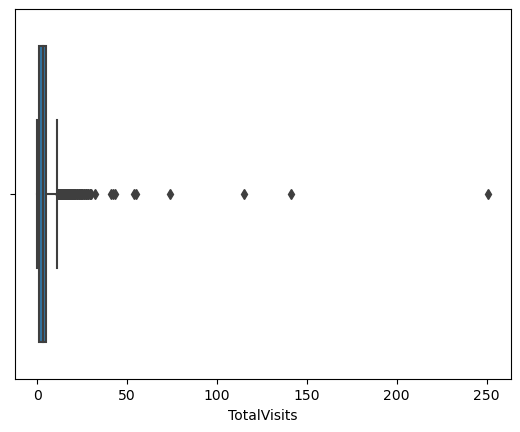

In [42]:
# Creating a boxplot to check distribution
sns.boxplot(x = df.TotalVisits)

# Displaying the graph
plt.show()

Capping the oultiers in TotalVisit Column using IQR.

In [43]:
# Calculate quartiles
q1 = df['TotalVisits'].quantile(0.25)
q3 = df['TotalVisits'].quantile(0.75)

# Calculate IQR
IQR = q3 - q1

# Calculate upper and lower bounds
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

# Cap upper bound
df['TotalVisits'] = np.where(df['TotalVisits'] > upper_bound, upper_bound, df['TotalVisits'])

# Floor lower bound
df['TotalVisits'] = np.where(df['TotalVisits'] < lower_bound, lower_bound, df['TotalVisits'])

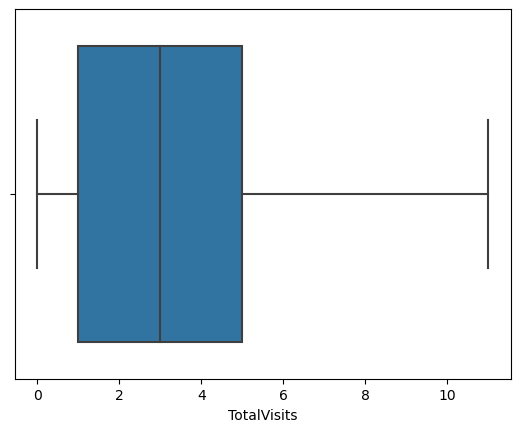

In [44]:
# Creating a boxplot to check distribution
sns.boxplot(x = df.TotalVisits)

# Displaying the graph
plt.show()

The TotalVisits column has 1.48% null values which can be imputed by the median as the data in this column is skewed.

In [45]:
# Impute missing values in the 'TotalVisits' column with the median
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)

# Checking the imputed values
df['TotalVisits'].value_counts()

TotalVisits
0.0     2189
2.0     1680
3.0     1443
4.0     1120
5.0      783
6.0      466
1.0      395
11.0     353
7.0      309
8.0      224
9.0      164
10.0     114
Name: count, dtype: int64

#### Page Views Per Visit

In [46]:
# Summary of descriptive statistics measures in the column
df['Page Views Per Visit'].describe(percentiles=[.10,.25,.50,.75,.95, .98, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
98%         8.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

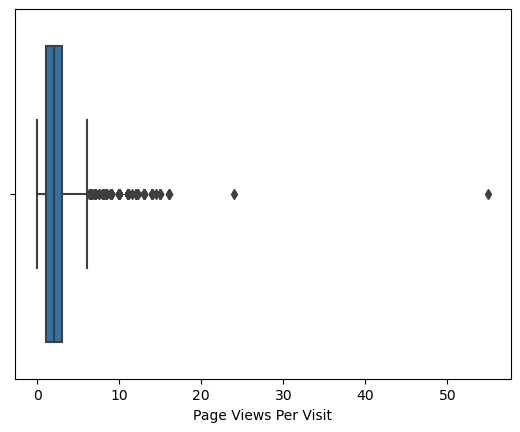

In [47]:
# Creating a boxplot to check distribution
sns.boxplot(x = df['Page Views Per Visit'])

# Displaying the graph
plt.show()

Capping the oultiers in Page Views Per Visit Column using IQR.

In [48]:
# Calculate quartiles
q1 = df['Page Views Per Visit'].quantile(0.25)
q3 = df['Page Views Per Visit'].quantile(0.75)

# Calculate IQR
IQR = q3 - q1

# Calculate upper and lower bounds
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

# Cap upper bound
df['Page Views Per Visit'] = np.where(df['Page Views Per Visit'] > upper_bound, upper_bound, df['Page Views Per Visit'])

# Floor lower bound
df['Page Views Per Visit'] = np.where(df['Page Views Per Visit'] < lower_bound, lower_bound, df['Page Views Per Visit'])

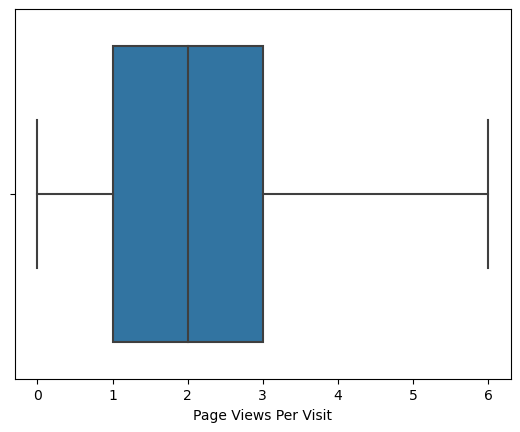

In [49]:
# Creating a boxplot to check distribution
sns.boxplot(x = df['Page Views Per Visit'])

# Displaying the graph
plt.show()

The Page Views Per Visit column has 1.48% null values which can be imputed by the median as the data in this column is skewed.

In [50]:
# Impute missing values in the 'Page Views Per Visit' column with the median
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

# Checking the imputed values
df['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1932
3.00    1196
4.00     896
1.00     651
        ... 
2.29       1
1.21       1
3.43       1
2.56       1
2.08       1
Name: count, Length: 91, dtype: int64

### Re-checking the Null values

In [51]:
# Checking for null value percenatge after data cleaning
null_percentage = round(((df.isnull().sum())/len(df)*100).sort_values(ascending=False), 2)
print(null_percentage)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

All the Null/missing values are removed.

### DROPPING NOT USEFUL COLUMNS

If the column doesn't have important information or repetated information than these columns can be deleted.
Columns to be deleted:
- Prospect ID 
- Lead Number
- Last Notable Activity 
Prospect ID and Lead number columns provide unique IDs for all the cases and don't add any value to the model.
Whereas, as  the data in the columnn 'Last Noatble Activity' are covered in 'Last Activity' with additional details

In [52]:
# Dropping Prospect ID column
df.drop('Prospect ID', axis=1, inplace=True)

# Display the first few rows of the DataFrame
df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Others   
1                   2.5             Email Opened                   Others   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Others   

  What is your current occupation Search Magazine Newspaper Article  \
0                      Unemployed     No       No                No   
1                      Unemployed     No       No                No   
2                         Student     No       No                No   
3                      Unemployed     No       No                No   
4                      Unemployed     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [53]:
# Dropping Lead Number column
df.drop('Lead Number', axis=1, inplace=True)

# Checking the data after transformation
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation Search Magazine Newspaper Article  \
0                      Unemployed     No       No                No   
1                      Unemployed     No       No                No   
2                         Student     No       No                No   
3                      Unemployed     No       No                No   
4                      Unemployed     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [54]:
# Dropping the Last Notable Activity 
df.drop("Last Notable Activity", axis=1, inplace=True)

# Checking the data after transformation
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation Search Magazine Newspaper Article  \
0                      Unemployed     No       No                No   
1                      Unemployed     No       No                No   
2                         Student     No       No                No   
3                      Unemployed     No       No                No   
4                      Unemployed     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

#### DROPPING COLUMNS WITH ONE UNIQUE VALUE

Columns with only one unique value do not provide any useful information for the model and can be dropped.

In [55]:
# Find columns with only one unique value
unique_value_columns = df.columns[df.nunique() == 1]
unique_value_columns

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

In [56]:
# Summarize and drop columns with one unique value
if len(unique_value_columns) > 0:
    print("Columns with one unique value:")
    print(unique_value_columns)
    df.drop(columns=unique_value_columns, inplace=True)
    print("Columns dropped:", len(unique_value_columns))
else:
    print("No columns with one unique value found.")

Columns with one unique value:
Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')
Columns dropped: 5


In [57]:
# Checking the shape of the dataframe after transformation
df.shape

(9240, 18)

### CHECKING AND DROPPING COLUMNS WITH EXTREME SKEWED DATA

If a has skewed data then it can lead to creation of a biased module. Hence, it better to drop columns which have skewed data.

In [58]:
# Creating a list of all categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

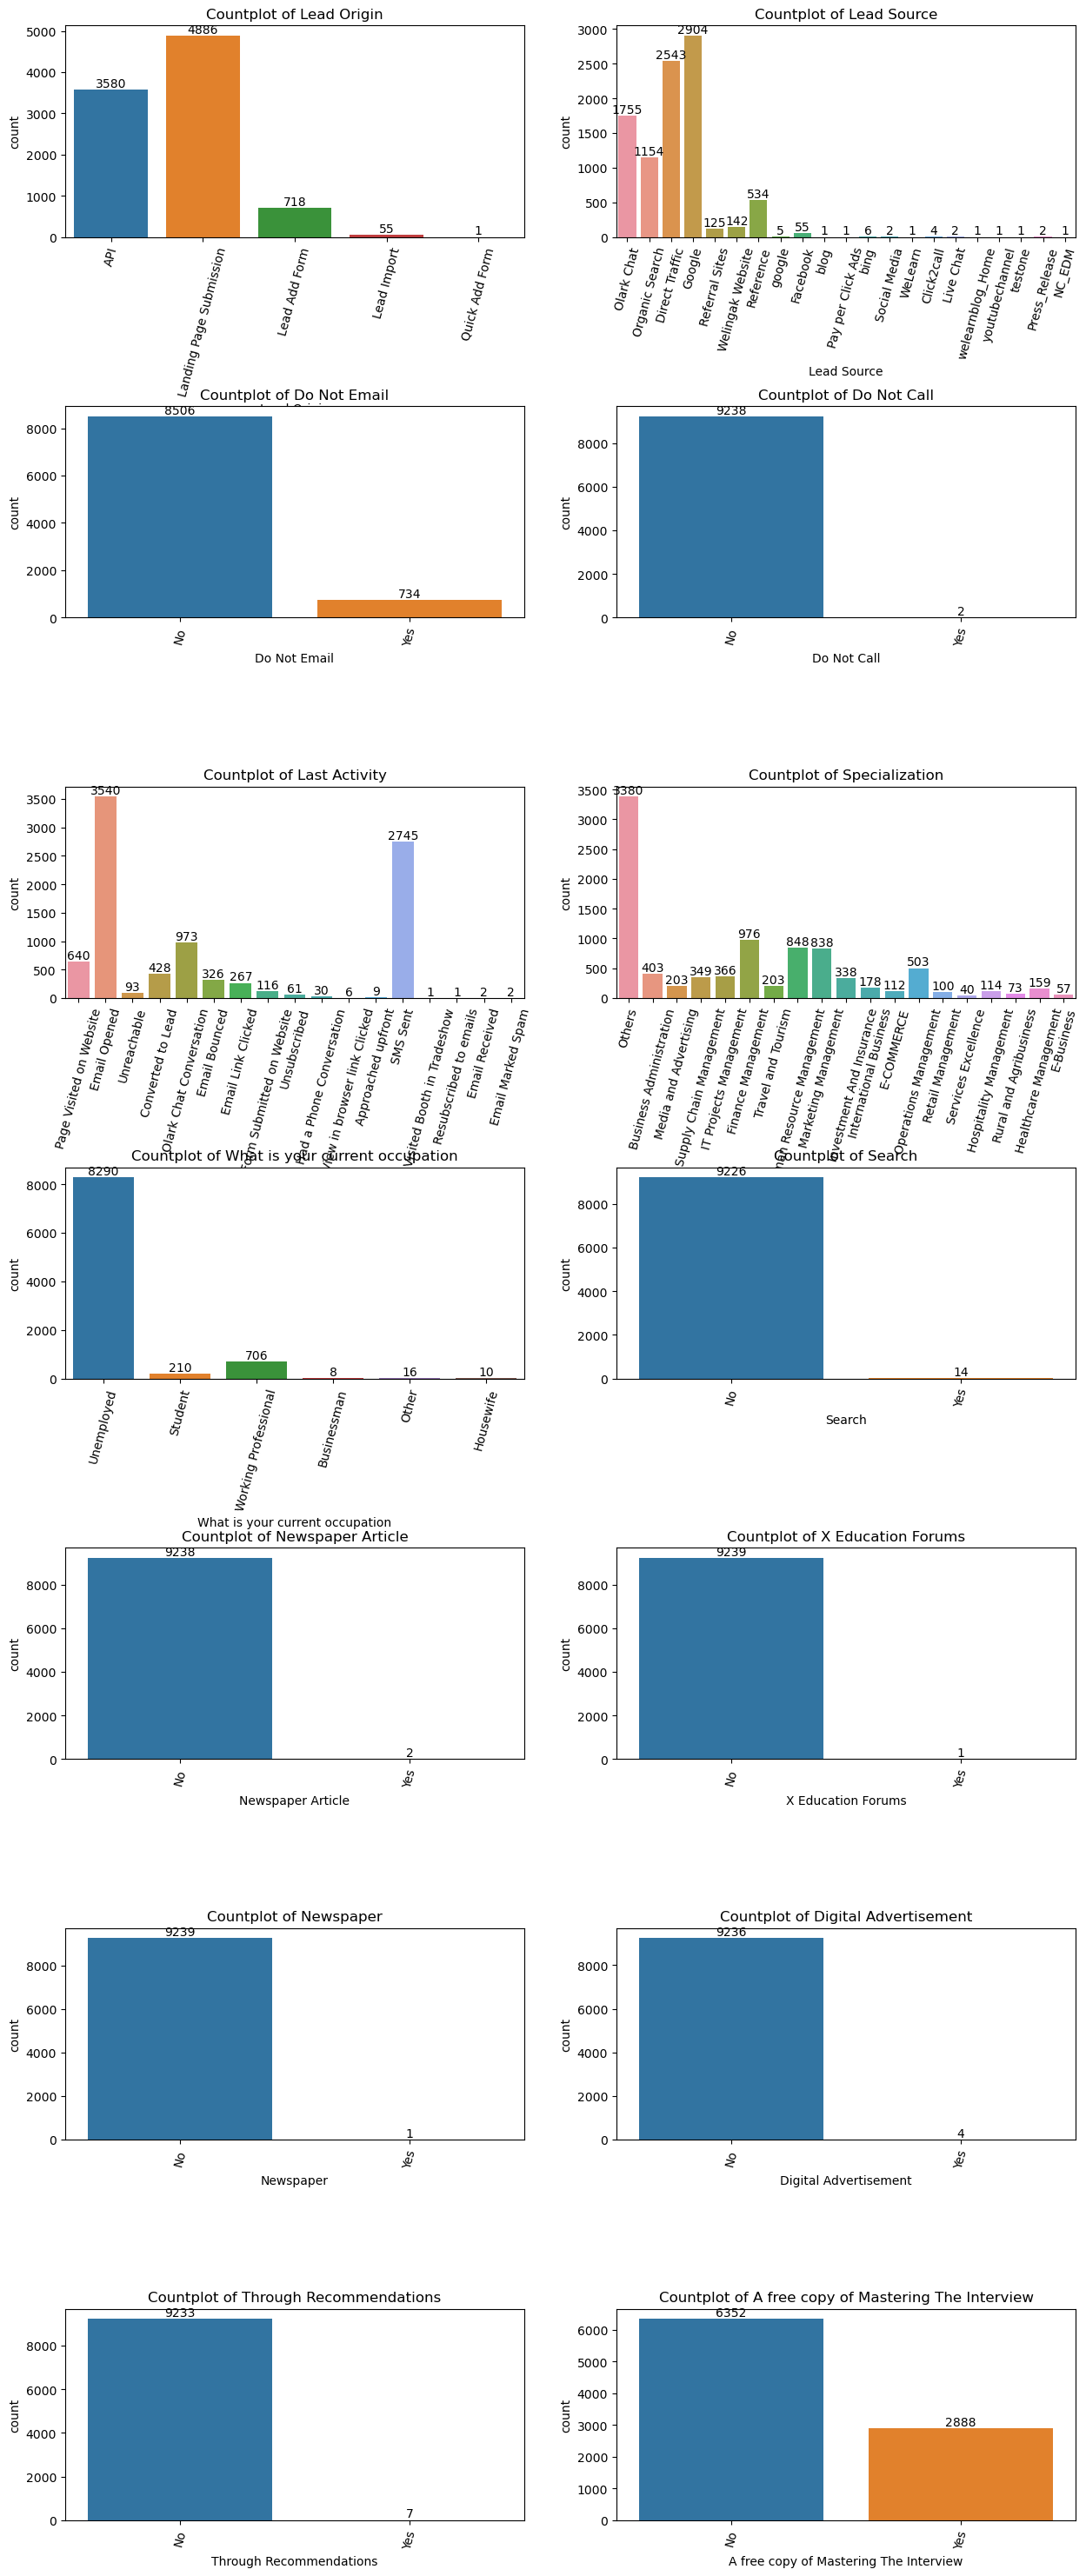

In [59]:
# Countplot for all categorical columns
# Create a new figure
plt.figure(figsize=(15,60))

plt.subplots_adjust(hspace=0.8)

# Iterate through categorical columns and plot countplots
for i, column in enumerate(categorical_columns, 1):
    
    # Plot each countplot in a separate subplot
    plt.subplot(11, 2, i)
    
    # Set subplot title
    plt.title("Countplot of {}".format(column))
    
    # Create countplot
    ax = sns.countplot(x=column, data=df) 
    
    # Rotate x-axis labels
    plt.xticks(rotation=75)
    
    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.show()

Dropping the following columns which have exterme skewed data:
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

Dropping these columns will prevent the model from being skewed.

In [60]:
# Dropping the columns with exterme skewed data
columns_to_drop = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']
df.drop(columns_to_drop, axis=1, inplace=True)

# Display the first few rows of the DataFrame after transformation
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [61]:
# Checking the shape of the dataframe
df.shape

(9240, 11)

#### CORRECTING WRONG VALUES

In [62]:
# Display the first few rows of the DataFrame
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [63]:
# Changing google to Google as they are same
df['Lead Source'] = df['Lead Source'].replace("google","Google")

# Checking the values
df['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

### MAPPING BINARY CATEGORICAL VARIABLES

The binary categorical variable columns 'Do Not Email' and 'A free copy of Mastering The Interview' were Yes and No should be mapped to 1 and 0.

In [64]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

# Display the first few rows of the DataFrame after transformation
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

In [65]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

In [66]:
# Changing 'Do Not Email' and 'A free copy of Mastering The Interview' data type to category
df[['Do Not Email', 'A free copy of Mastering The Interview']] = df[['Do Not Email', 'A free copy of Mastering The Interview']].astype('category')

#### Renaming long column name

In [67]:
# Renaming column name from "Total Time Spent on Website" to "Time_Spent" 
df.rename(columns={'Total Time Spent on Website': 'Time Spent'}, inplace=True)

# Renaming column name from "A free copy of Mastering The Interview" to "Free_copy"
df.rename(columns={'A free copy of Mastering The Interview': 'Free Copy'}, inplace=True)

# Renaming column name from "What is your current occupation" to "Current_occupation" 
df.rename(columns={'What is your current occupation': 'Current Occupation'}, inplace=True)

# # Display the first few rows of the DataFrame
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat            0          0   
1                      API  Organic Search            0          0   
2  Landing Page Submission  Direct Traffic            0          1   
3  Landing Page Submission  Direct Traffic            0          0   
4  Landing Page Submission          Google            0          1   

   TotalVisits  Time Spent  Page Views Per Visit            Last Activity  \
0          0.0           0                   0.0  Page Visited on Website   
1          5.0         674                   2.5             Email Opened   
2          2.0        1532                   2.0             Email Opened   
3          1.0         305                   1.0              Unreachable   
4          2.0        1428                   1.0        Converted to Lead   

            Specialization Current Occupation Free Copy  
0                   Others         Unemployed         0  
1                   Others         Unemployed         0  
2  Business Administration            Student         1  
3    Media and Advertising         Unemployed         0  
4                   Others         Unemployed         0

In [68]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Lead Origin           9240 non-null   object  
 1   Lead Source           9240 non-null   object  
 2   Do Not Email          9240 non-null   category
 3   Converted             9240 non-null   int64   
 4   TotalVisits           9240 non-null   float64 
 5   Time Spent            9240 non-null   int64   
 6   Page Views Per Visit  9240 non-null   float64 
 7   Last Activity         9240 non-null   object  
 8   Specialization        9240 non-null   object  
 9   Current Occupation    9240 non-null   object  
 10  Free Copy             9240 non-null   category
dtypes: category(2), float64(2), int64(2), object(5)
memory usage: 668.1+ KB


## EDA

### IMBALANCE CHECK

In [69]:
# Checking values in Converted column
df.Converted.unique()

array([0, 1], dtype=int64)

In [70]:
# Count of values in Converted column
df.Converted.value_counts(normalize=True)

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

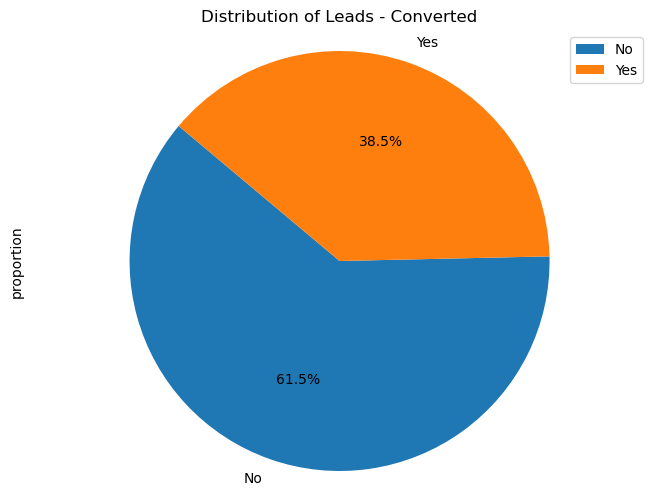

In [71]:
# Plotting the pie chart of Converted
# Adjusting figure size
plt.figure(figsize=(8, 6))

# Adding labels
label = ['No', 'Yes']

# Plotting the pie chart
df['Converted'].value_counts(normalize=True).plot(kind='pie', labels=label, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title("Distribution of Leads - Converted")

# Adjusting legend position
plt.legend(loc="upper right")

# Ensuring aspect ratio is equal to create a perfect circle
plt.axis('equal')

# Displaying the graph
plt.show()

Converion rate of the leads is 38.5% where as a majority of people (61.5%) don't convert.

In [72]:
# Calculate the Imbalance Ratio
Imbalance_Ratio = df["Converted"].value_counts(normalize=True).loc[0] / df["Converted"].value_counts(normalize=True).loc[1]

# Print the imbalance ratio
print("Data Imbalance Ratio- {:.2f} : {}".format(Imbalance_Ratio, 1))

Data Imbalance Ratio- 1.59 : 1


### UNIVARIATE ANALYSIS

#### CATEGORICAL VARIABLES

In [73]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Lead Origin           9240 non-null   object  
 1   Lead Source           9240 non-null   object  
 2   Do Not Email          9240 non-null   category
 3   Converted             9240 non-null   int64   
 4   TotalVisits           9240 non-null   float64 
 5   Time Spent            9240 non-null   int64   
 6   Page Views Per Visit  9240 non-null   float64 
 7   Last Activity         9240 non-null   object  
 8   Specialization        9240 non-null   object  
 9   Current Occupation    9240 non-null   object  
 10  Free Copy             9240 non-null   category
dtypes: category(2), float64(2), int64(2), object(5)
memory usage: 668.1+ KB


In [74]:
# Creating a list of all categorical columns
categorical_columns = categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'Current Occupation',
 'Free Copy']

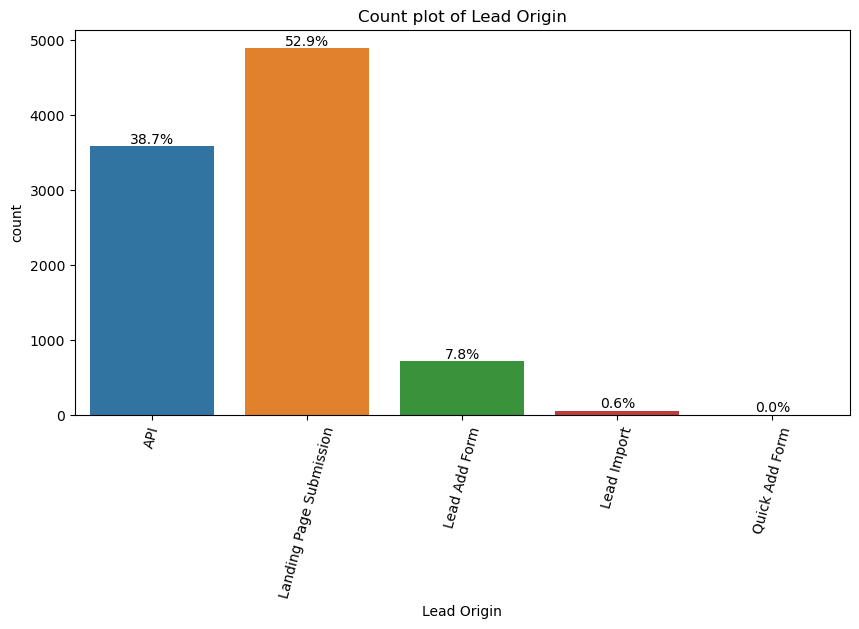

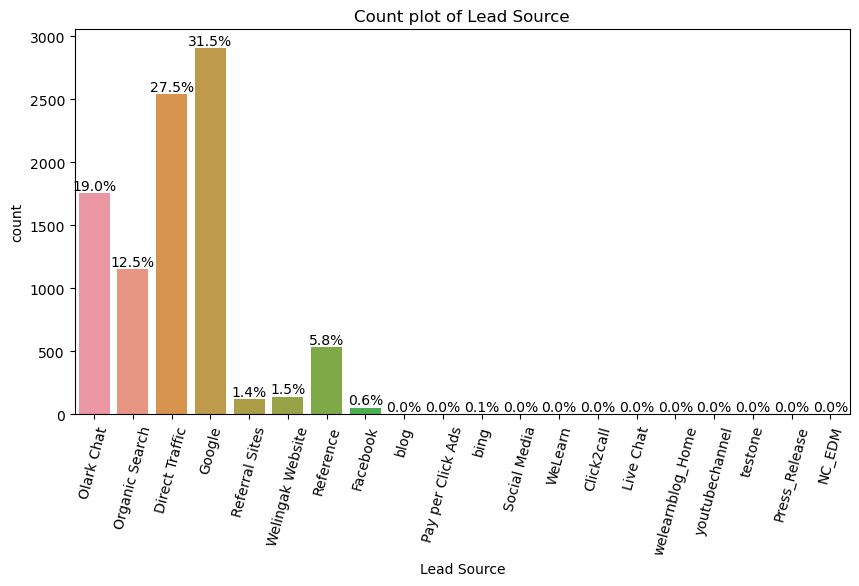

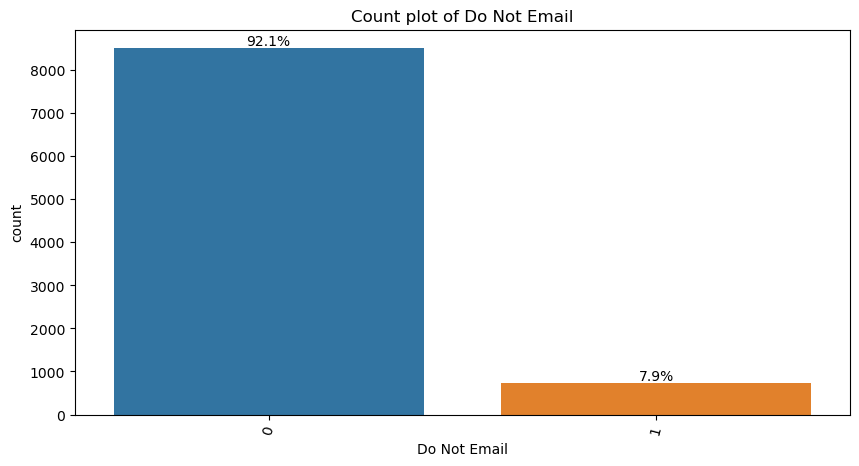

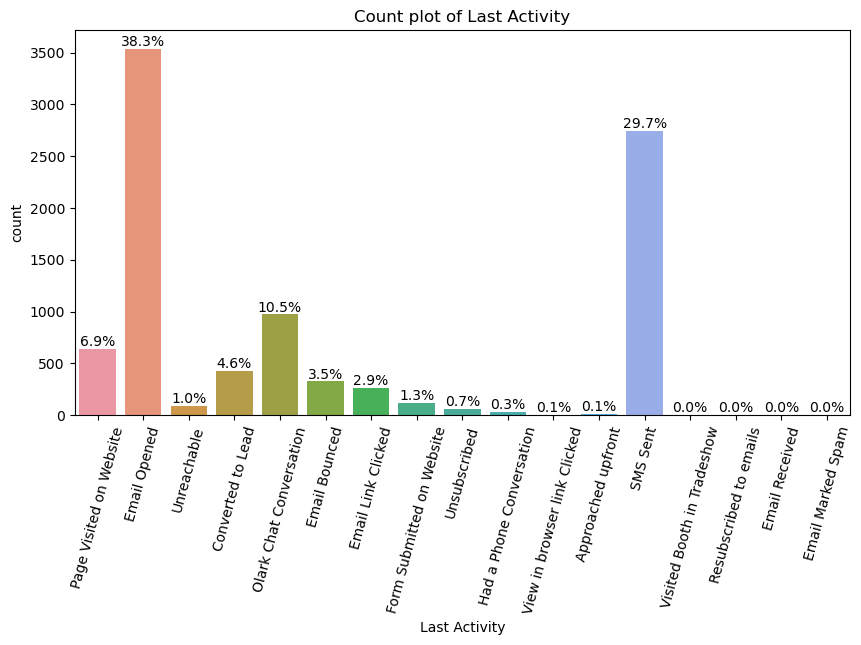

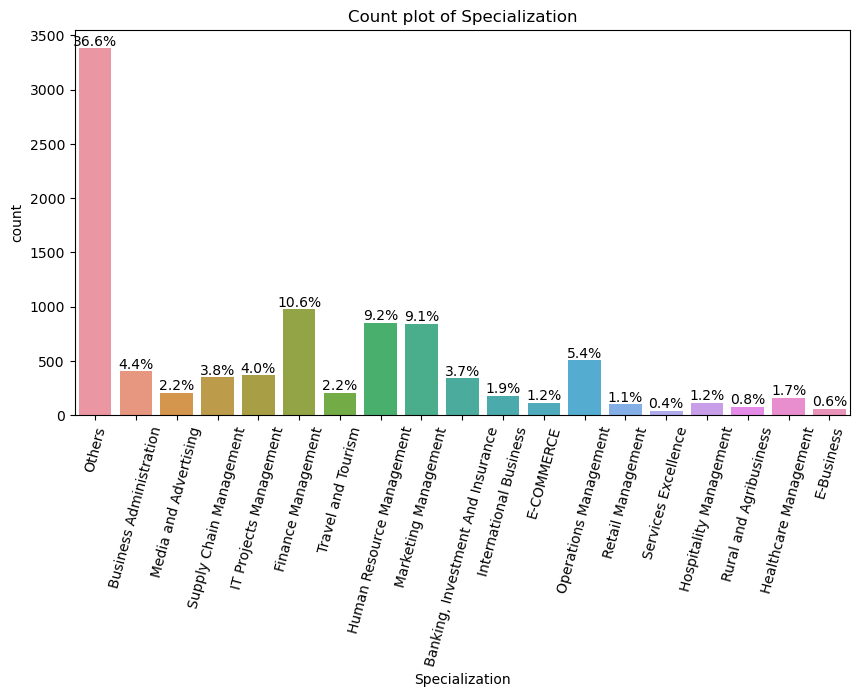

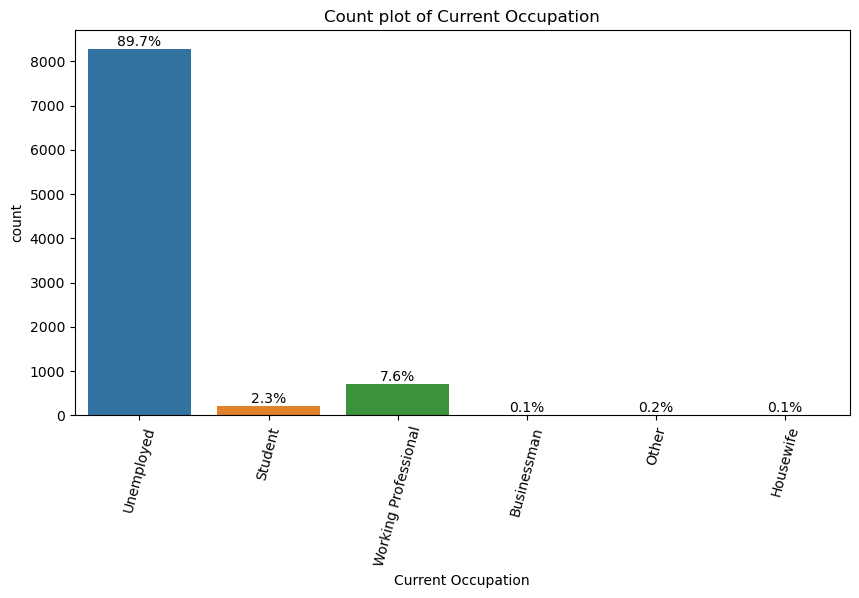

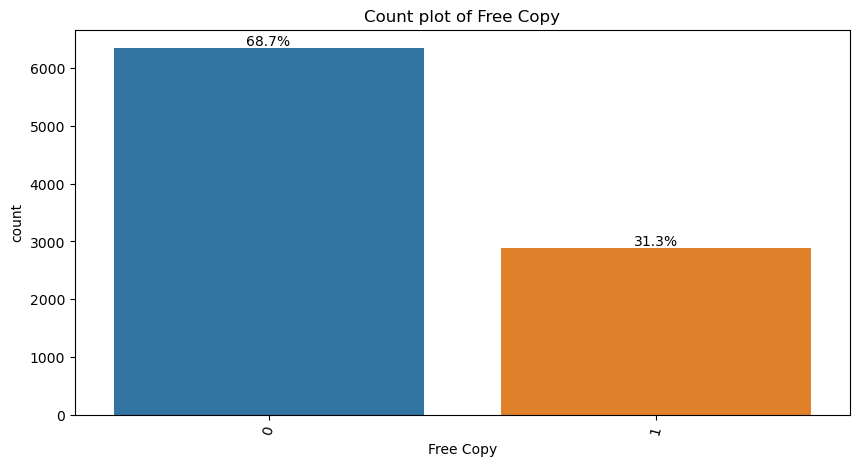

In [75]:
# Iterate through all categorical columns
for i in categorical_columns[:9]:
    
    # Create a new figure
    plt.figure(figsize=[10,5])
    
    # Set title of the plot
    plt.title("Count plot of {}".format(i))
    
    # Create countplot
    ax = sns.countplot(x=i, data=df)
    
    # Calculate total count for percentage calculation
    total = len(df[i])
    
    # Rotate x-axis labels
    plt.xticks(rotation=75)
    
    # Annotate each bar with its percentage value
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height()/ total)
        x = p.get_x() + p.get_width()/ 2.
        y = p.get_height()
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


#### NUMERICAL VARIABLES

In [76]:
# Creating a list of all categorical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.to_list()
numerical_columns

['Converted', 'TotalVisits', 'Time Spent', 'Page Views Per Visit']

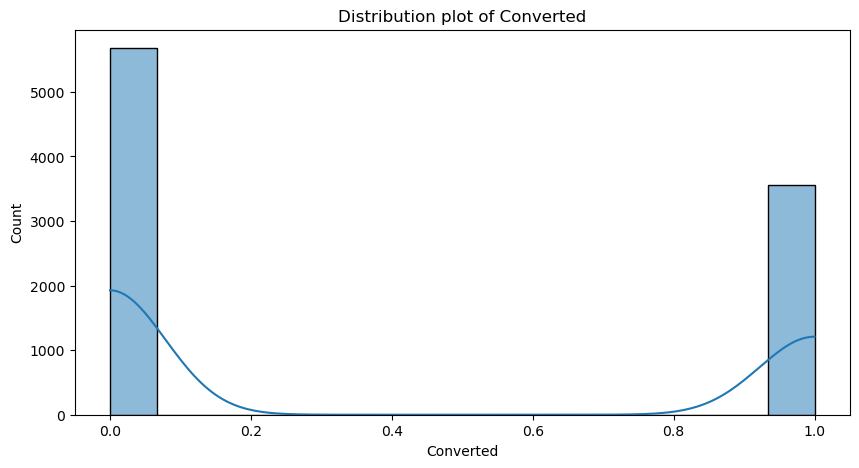

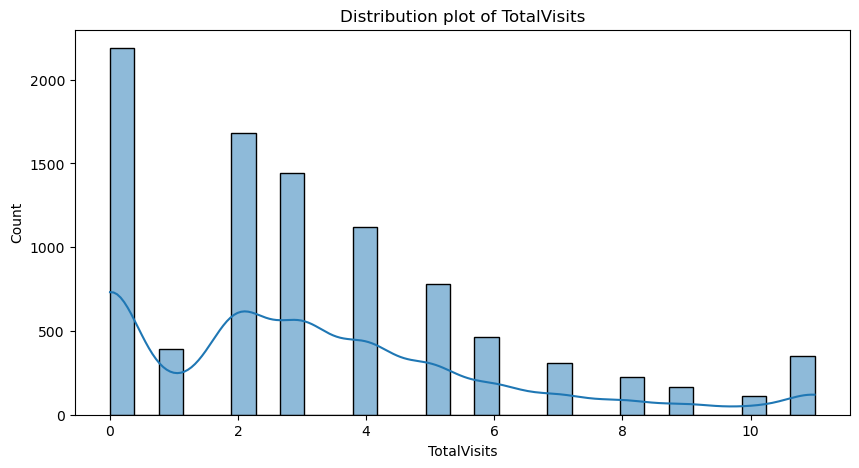

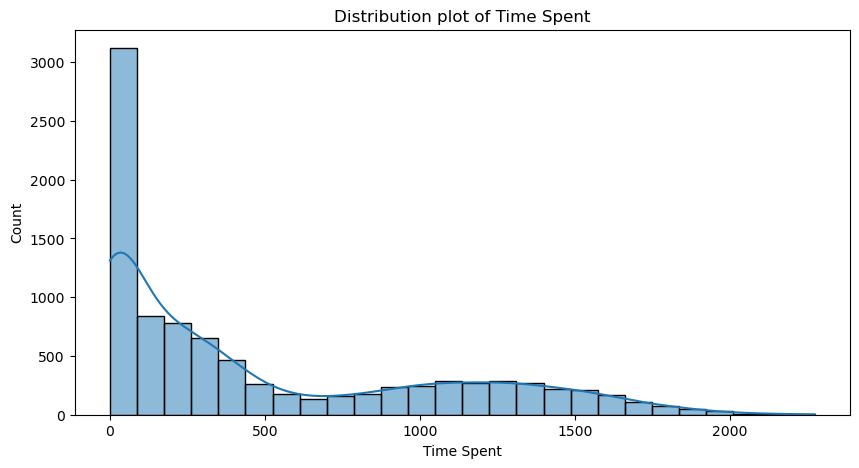

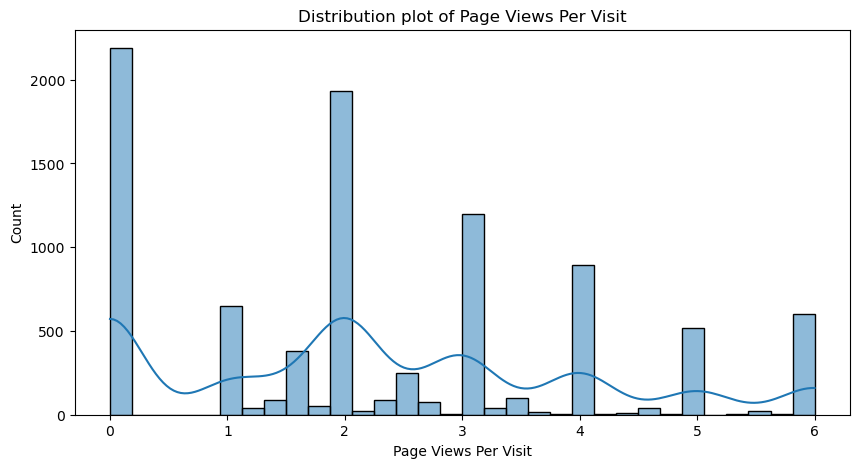

In [77]:
# Iterate through all numerical columns
for i in numerical_columns[:4]:
    
    # Create a new figure
    plt.figure(figsize=[10,5])
    
    # Set title of the plot
    plt.title("Distribution plot of {}".format(i))
    
    # Create distribution plot
    sns.histplot(df[i], kde=True)
    
    # Rotate x-axis labels
    plt.xticks(rotation=0)
    
    # Displaying the graph
    plt.show()

### BIVARIATE ANALYSIS

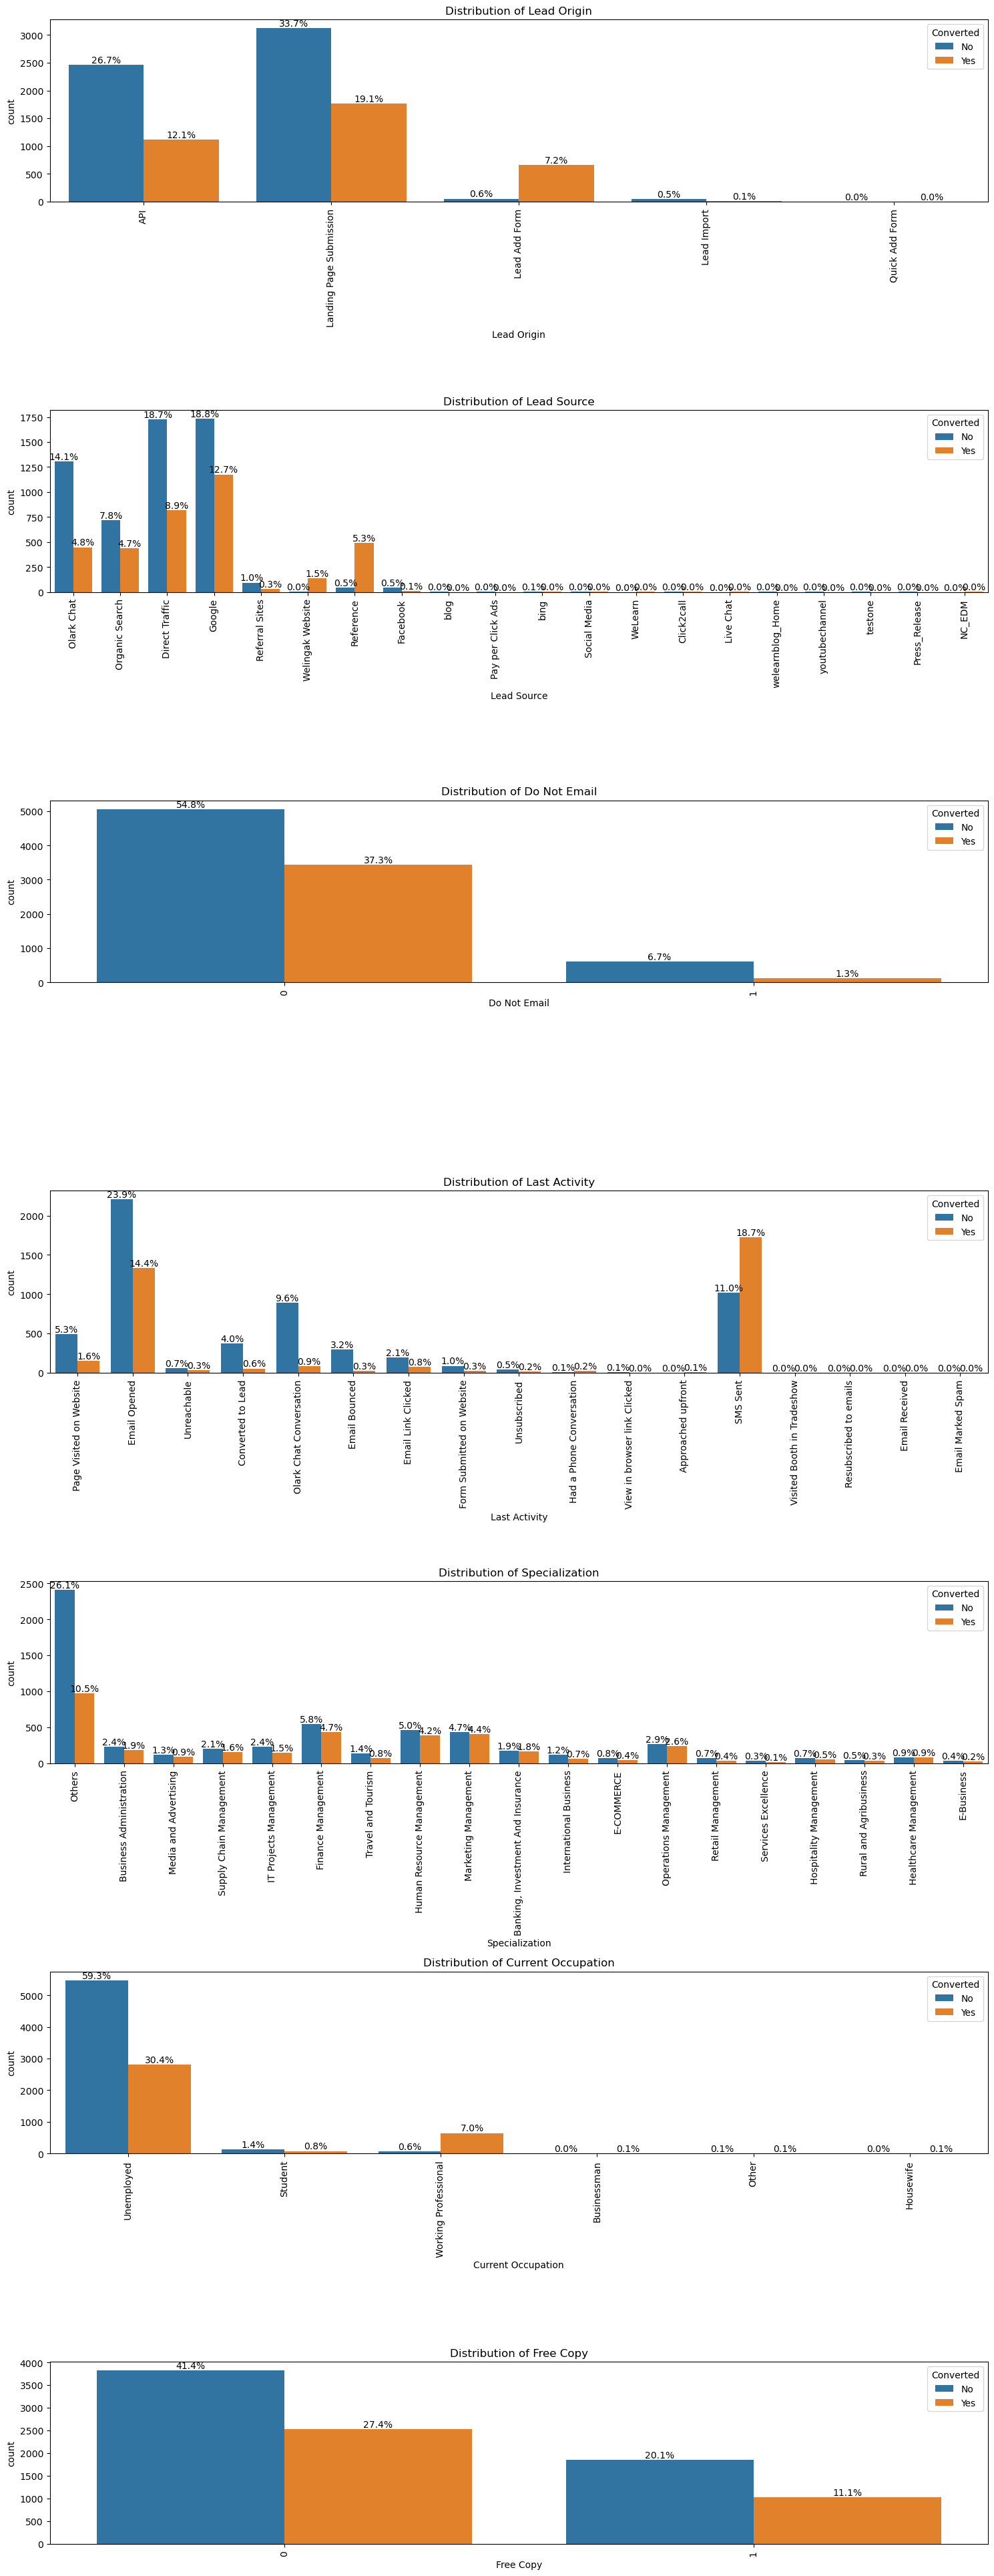

In [78]:
# Calculate the number of rows and columns needed for subplots
num_cols = 1
num_rows = 9

# Create subplots
plt.figure(figsize=(15, 50))

# Iterate through categorical columns
for index, col in enumerate(categorical_columns, 1):
    # Creating subplots
    plt.subplot(num_rows, num_cols, index)
    
    # PLot title
    plt.title("Distribution of {}".format(col))
    
    # Plot countplot for distribution
    ax = sns.countplot(x=col, hue="Converted", data=df)
    
    # Calculate total count for percentage calculation
    total = len(df[col])
    
    # Rotating the x-axis values
    plt.xticks(rotation=90)
    
    # Adding legend and it's title
    plt.legend(["No", "Yes"], title="Converted")
    
    # Annotate each bar with its percentage value
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()

# Displaying the graph
plt.show()

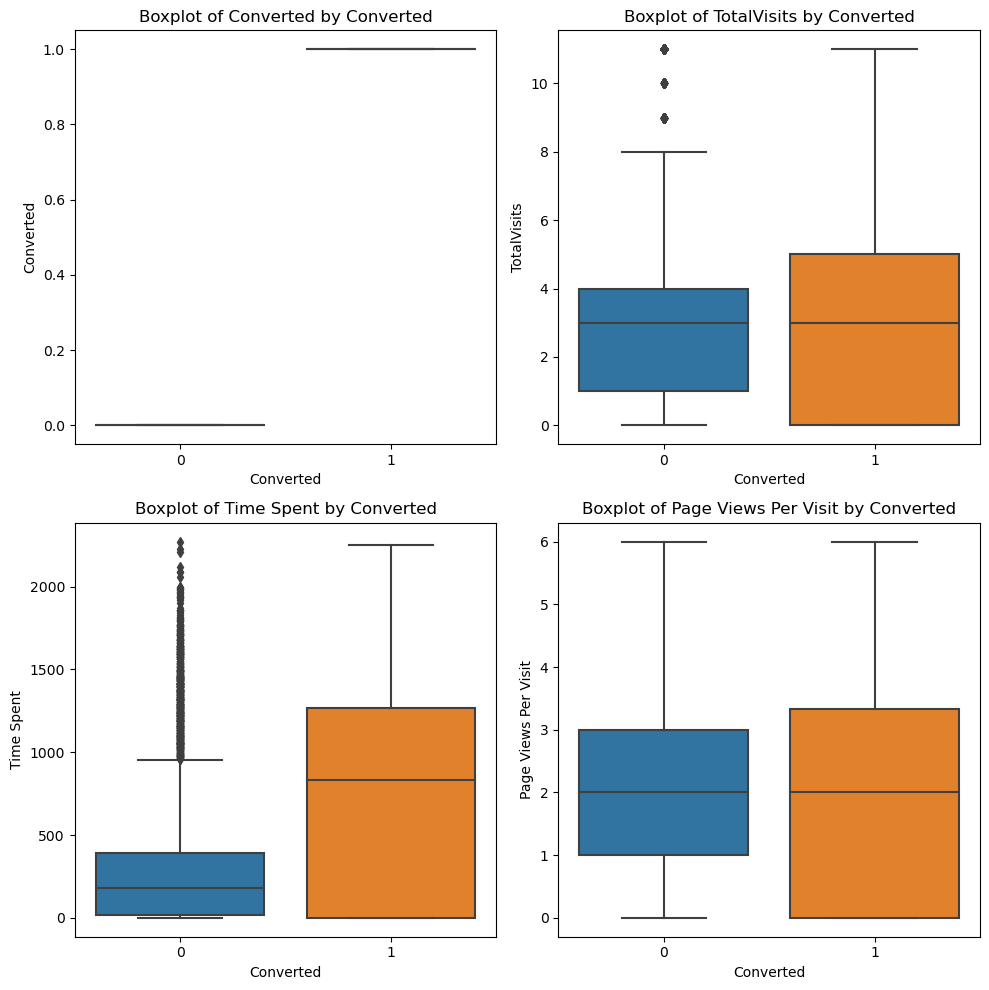

In [79]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Adjusting the height of subplots
plt.subplots_adjust(hspace=0.5)

# Iterate through numerical columns
for i, feature in enumerate(numerical_columns):
    # Plot boxplot for each numerical feature
    sns.boxplot(y=feature, x='Converted', data=df, ax=axes[i//2, i%2])
    
    # Set title for each subplot
    axes[i//2, i%2].set_title('Boxplot of {} by Converted'.format(feature))
    
    # Set xlabel for each subplot
    axes[i//2, i%2].set_xlabel('Converted')
    
    # Set ylabel for each subplot
    axes[i//2, i%2].set_ylabel(feature)

# Adjust layout
plt.tight_layout()

# Displaying the graph
plt.show()

<Figure size 1400x800 with 0 Axes>

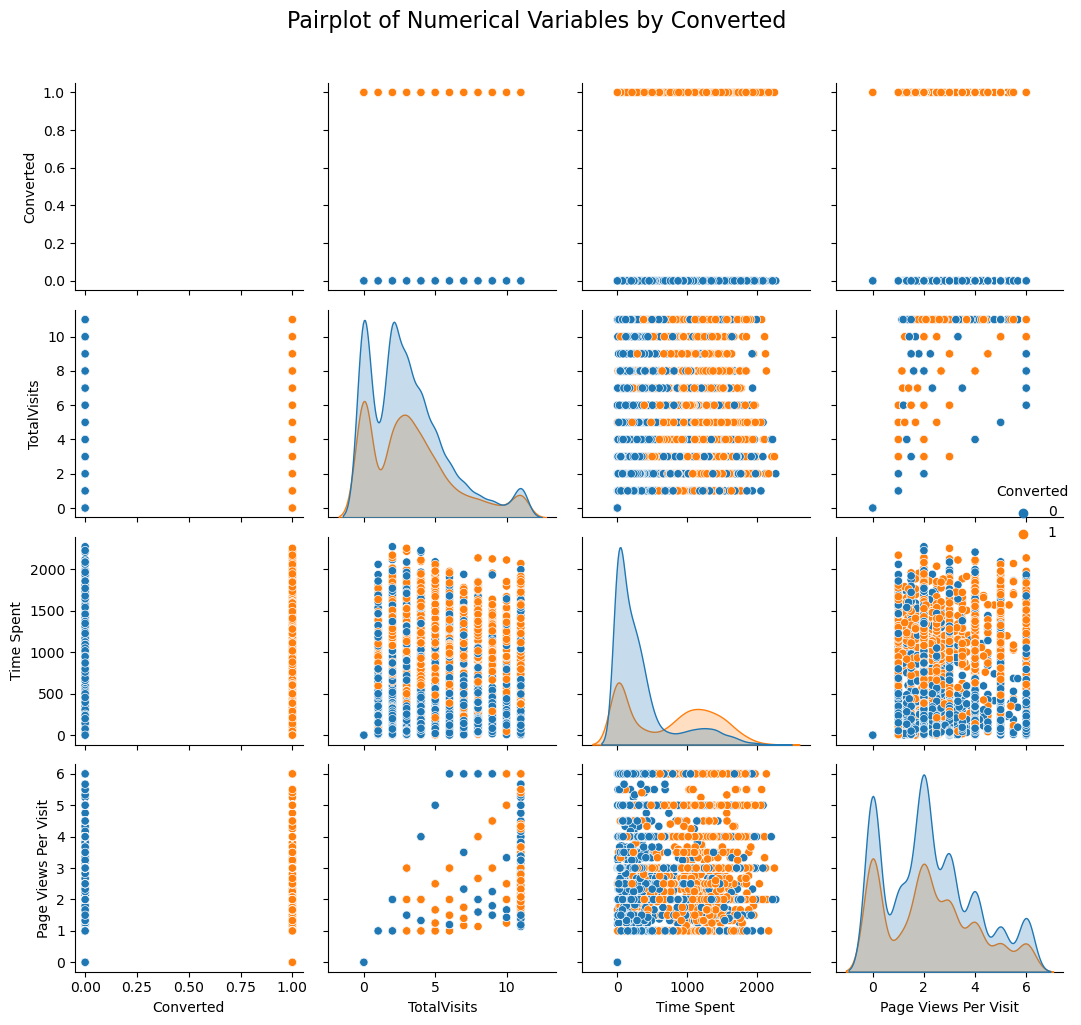

In [80]:
# Set the figure size and style
plt.figure(figsize=(14, 8))

# Create pairplot with customized appearance
pair_plot = sns.pairplot(data=df, vars=numerical_columns, hue="Converted")

# Set titles for the pairplot and legend
pair_plot.fig.suptitle("Pairplot of Numerical Variables by Converted", y=1.02, fontsize=16)
pair_plot._legend.set_title("Converted")

# Adjust layout and display the plot
plt.tight_layout()

# Displaying the graph
plt.show()

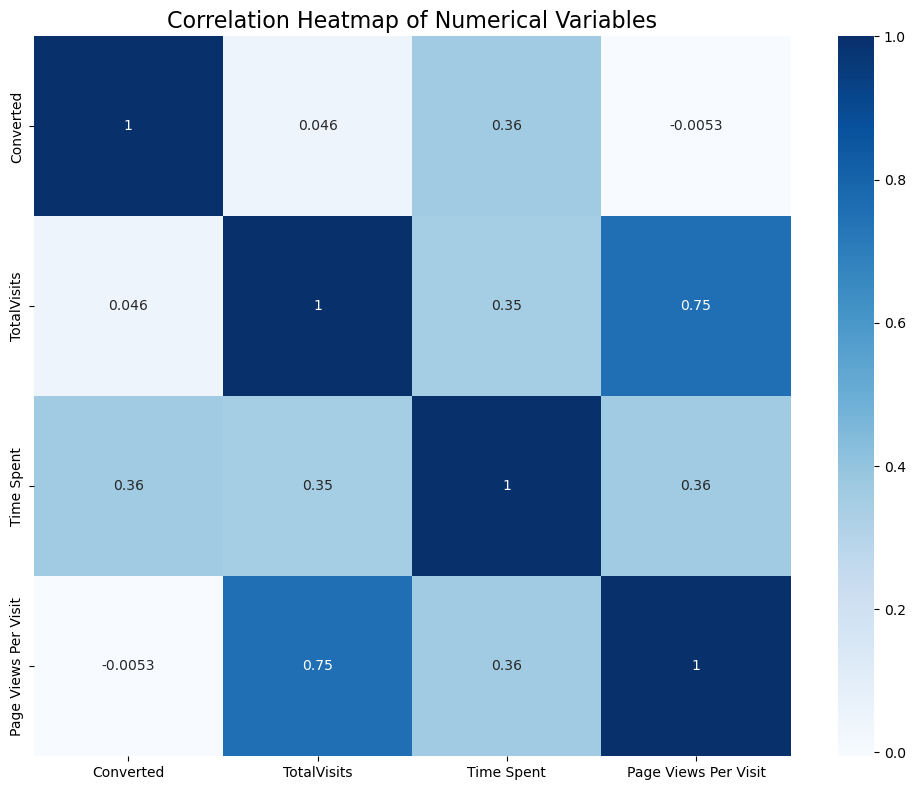

In [81]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create heatmap with customized appearance
heatmap = sns.heatmap(data=df[numerical_columns].corr(), cmap="Blues", annot=True)

# Set title for the heatmap
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()

# Displaying the graph
plt.show()

## DUMMY VARIABLES

Categorical varibles with multiple levels will need to create dummy features.

In [82]:
# Display the first few rows of the DataFrame
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat            0          0   
1                      API  Organic Search            0          0   
2  Landing Page Submission  Direct Traffic            0          1   
3  Landing Page Submission  Direct Traffic            0          0   
4  Landing Page Submission          Google            0          1   

   TotalVisits  Time Spent  Page Views Per Visit            Last Activity  \
0          0.0           0                   0.0  Page Visited on Website   
1          5.0         674                   2.5             Email Opened   
2          2.0        1532                   2.0             Email Opened   
3          1.0         305                   1.0              Unreachable   
4          2.0        1428                   1.0        Converted to Lead   

            Specialization Current Occupation Free Copy  
0                   Others         Unemployed         0  
1                   Others         Unemployed         0  
2  Business Administration            Student         1  
3    Media and Advertising         Unemployed         0  
4                   Others         Unemployed         0

In [83]:
# Creating dummy variables for all the categorical variables
df = pd.get_dummies(df, drop_first=True, dtype=int)

# Display the first few rows of the DataFrame
df.head()

Converted  TotalVisits  Time Spent  Page Views Per Visit  \
0          0          0.0           0                   0.0   
1          0          5.0         674                   2.5   
2          1          2.0        1532                   2.0   
3          0          1.0         305                   1.0   
4          1          2.0        1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_testone  Lead Source_welearnblog_Home  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   Lead Source_

In [84]:
# Checking the shape of the dataframe
df.shape

(9240, 68)

In [85]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Converted                                   9240 non-null   int64  
 1   TotalVisits                                 9240 non-null   float64
 2   Time Spent                                  9240 non-null   int64  
 3   Page Views Per Visit                        9240 non-null   float64
 4   Lead Origin_Landing Page Submission         9240 non-null   int32  
 5   Lead Origin_Lead Add Form                   9240 non-null   int32  
 6   Lead Origin_Lead Import                     9240 non-null   int32  
 7   Lead Origin_Quick Add Form                  9240 non-null   int32  
 8   Lead Source_Direct Traffic                  9240 non-null   int32  
 9   Lead Source_Facebook                        9240 non-null   int32  
 10  Lead Source_

## TEST-TRAIN SPLIT

In [86]:
# Assigning X and y variables
#  X variables
X = df.drop(['Converted'], axis=1)

# Y variables
y = df["Converted"]

In [87]:
# Splitting data in train and test dataset
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [88]:
# Shape of the datasets
print("Train X shape:", X_train.shape)
print("Test X shape:", X_test.shape)
print("Train y shape:", y_train.shape)
print("Test y shape:", y_test.shape)

Train X shape: (7392, 67)
Test X shape: (1848, 67)
Train y shape: (7392,)
Test y shape: (1848,)


## SCALING

In [89]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [90]:
# Convert scaled arrays to DataFrame with column names

# X Test DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# X Train DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [91]:
# Checking the Conversion Rate
Conversion_Rate = (sum(df['Converted'])/len(df['Converted'].index))*100
Conversion_Rate

38.53896103896104

In [92]:
# # Summary of descriptive statistics measures of numerical columns
X_train_scaled.describe()

TotalVisits   Time Spent  Page Views Per Visit  \
count  7392.000000  7392.000000           7392.000000   
mean      0.293229     0.212672              0.375807   
std       0.260210     0.240339              0.296133   
min       0.000000     0.000000              0.000000   
25%       0.090909     0.005282              0.166667   
50%       0.272727     0.108275              0.333333   
75%       0.454545     0.406690              0.500000   
max       1.000000     1.000000              1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          7392.000000                7392.000000   
mean                              0.530032                   0.079140   
std                               0.499131                   0.269975   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
count              7392.000000                 7392.000000   
mean                  0.005411                    0.000135   
std                   0.073367                    0.011631   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 7392.000000           7392.000000         7392.000000   
mean                     0.274756              0.005411            0.318452   
std                      0.446422              0.073367            0.465908   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
count            7392.000000         7392.000000             7392.000000   
mean                0.000271            0.000135                0.188447   
std                 0.016448            0.011631                0.391095   
min                 0.000000            0.000000                0.000000   
25%                 0.000000            0.000000                0.000000   
50%                 0.000000            0.000000                0.000000   
75%                 0.000000            0.000000                0.000000   
max                 1.000000            1.000000                1.000000   

       Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
count                 7392.000000                    7392.000000   
mean                     0.121753                       0.000135   
std                      0.327023                       0.011631   
min                      0.000000                       0.000000   
25%                      0.000000                       0.000000   
50%                      0.000000                       0.000000   
75%                      0.000000                       0.000000   
max                      1.000000                       1.000000   

       Lead Source_Press_Release  Lead Source_Reference  \
count                7392.000000            7392.000000   
mean                    0.000271               0.059659   
std                     0.016448               0.236870   
min                     0.0000

### CORRELATIONS

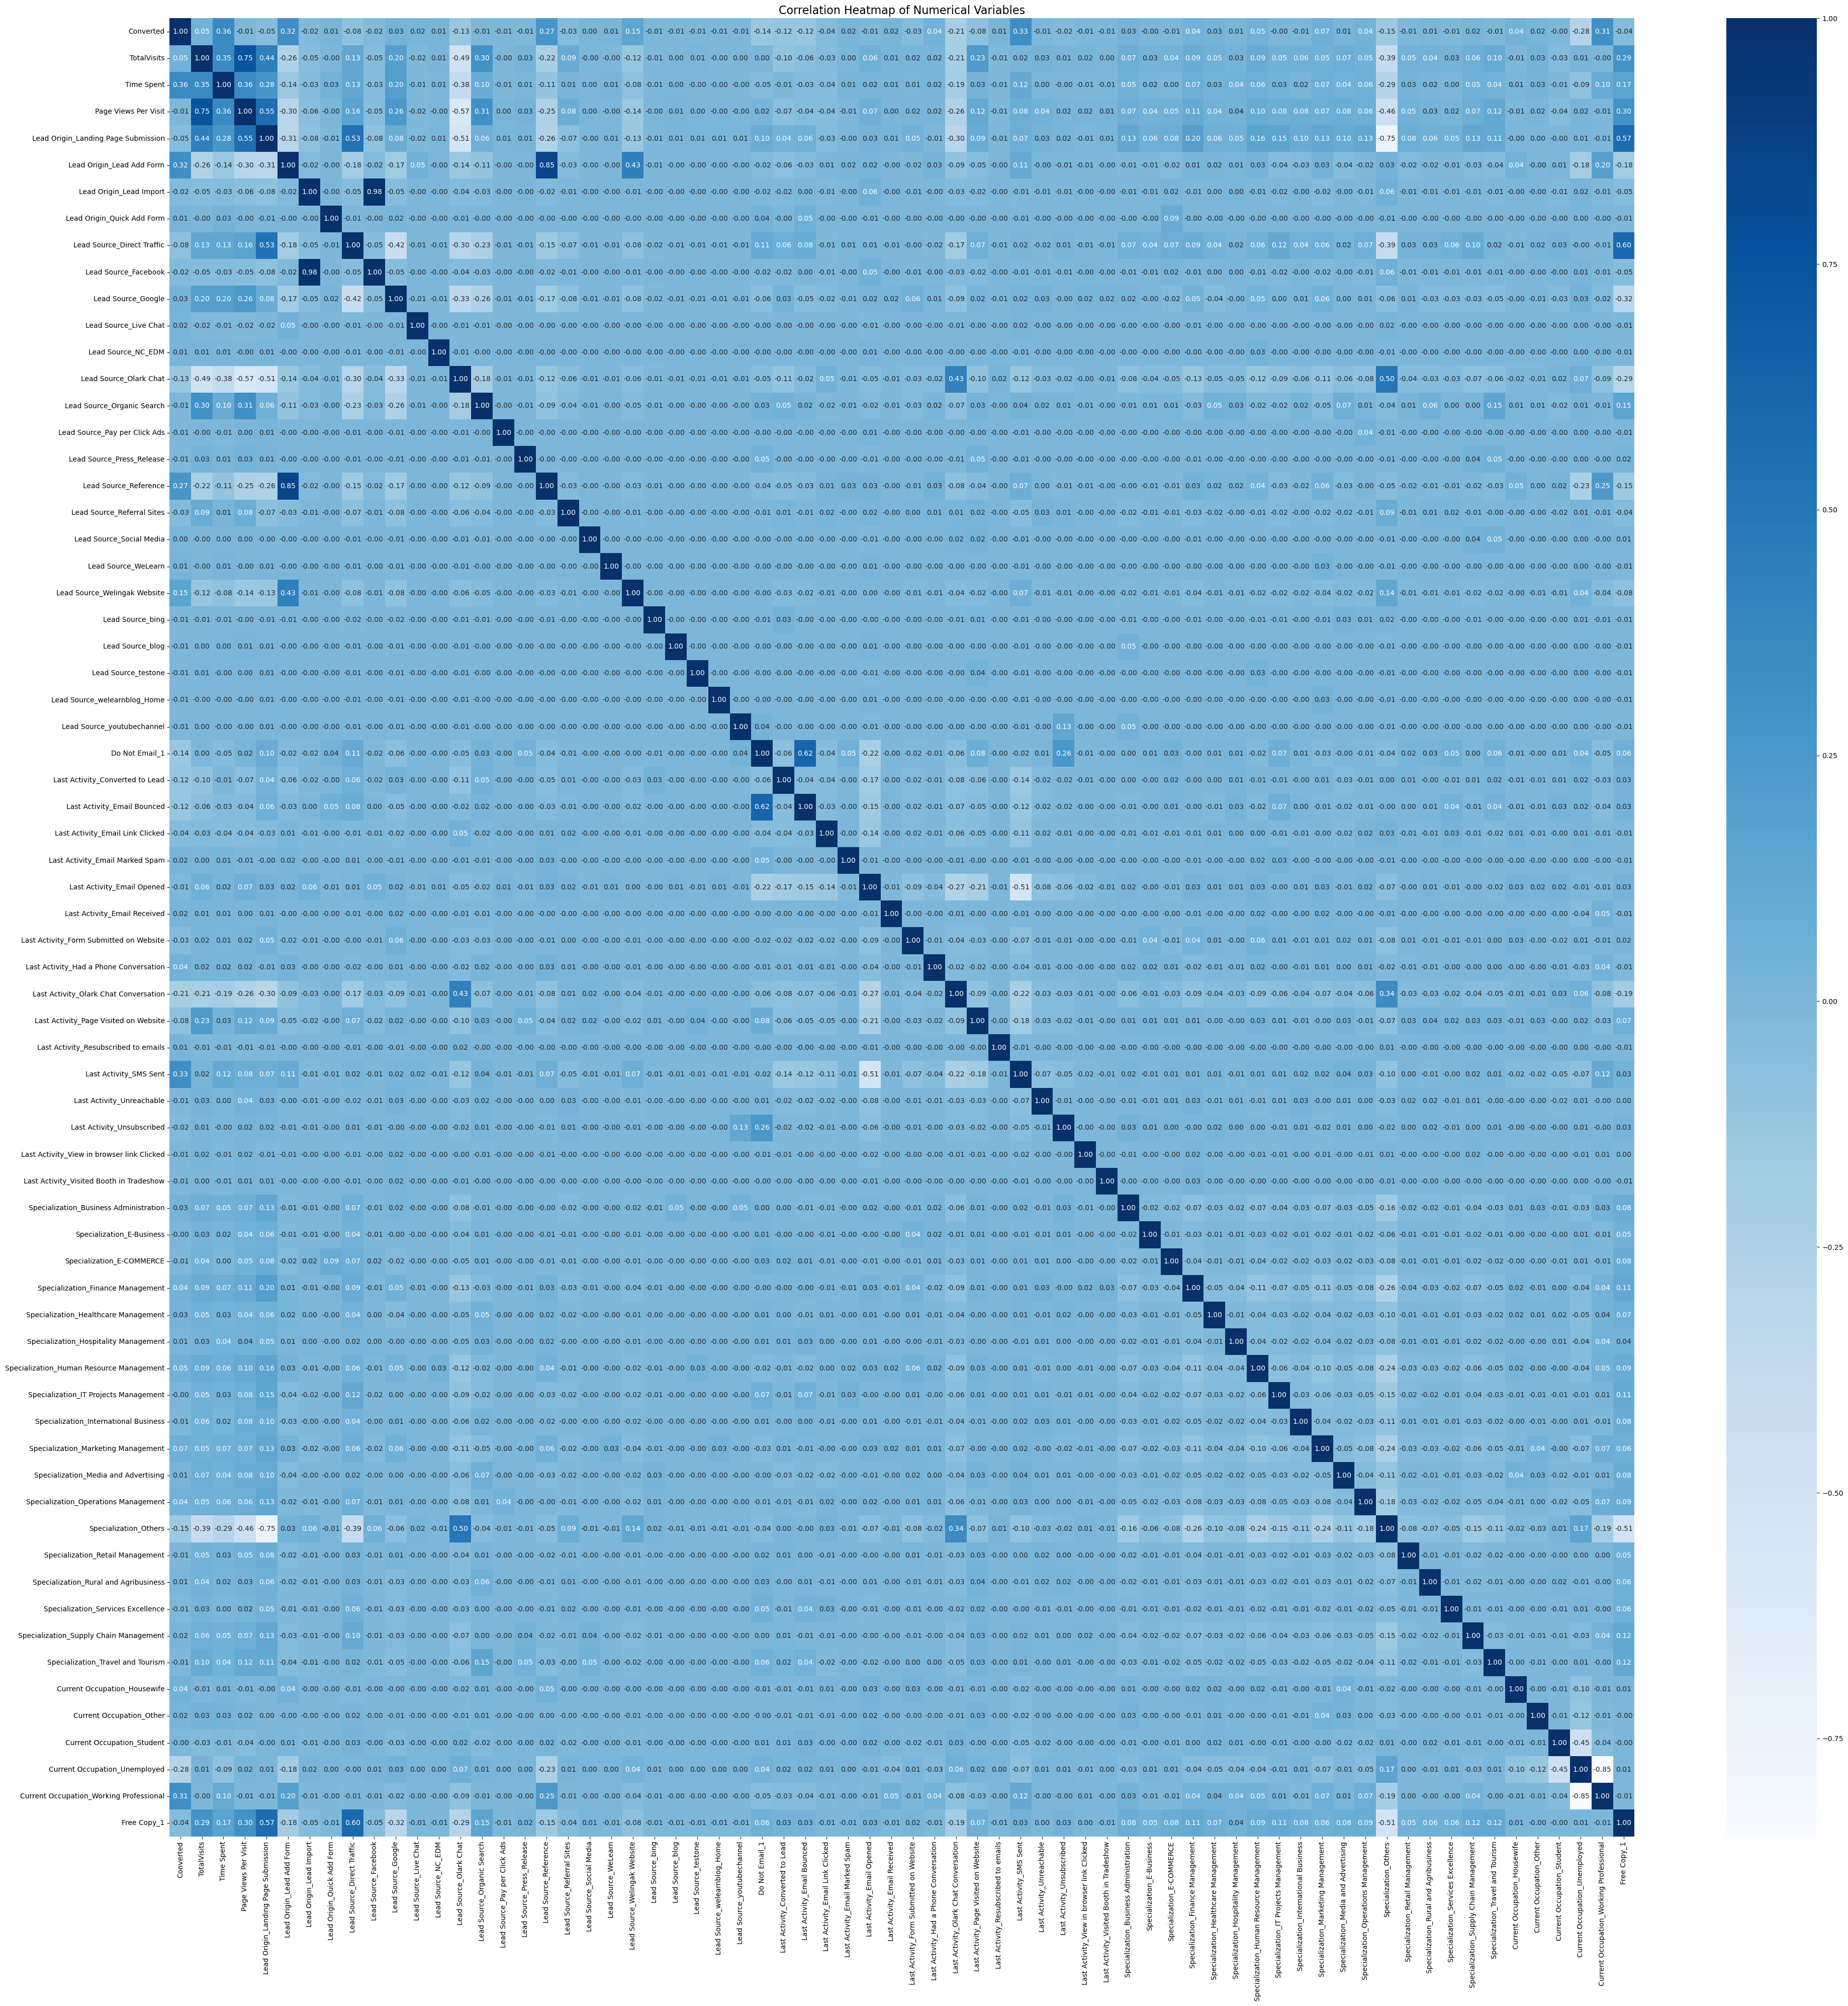

In [93]:
# Set the figure size
plt.figure(figsize=(40, 40))

# Create heatmap with customized appearance
heatmap = sns.heatmap(data=df.corr(), cmap="Blues", annot=True, fmt=".2f")

# Set title for the heatmap
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()

# Displaying the graph
plt.show()

## MODEL BUILDING
Logistic Regression Models are build for predicting categorical variables. Here, Feature Selection is done by using RFE followed by manual tuning using p-values and VIFs.

### FEATURE SELECTION

In [94]:
# Instantiate Logistic Regression estimator
estimator = LogisticRegression()

# Initialize Recursive Feature Elimination (RFE) with estimator and number of features to select
rfe = RFE(estimator,n_features_to_select=15)

# Fit RFE on scaled training data
rfe.fit(X_train_scaled,y_train)

# Selected features
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False])

In [95]:
# List of RFE features and their ranking
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Time Spent', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 28),
 ('Lead Source_NC_EDM', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', False, 44),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 35),
 ('Lead Source_blog', False, 22),
 ('Lead Source_testone', False, 53),
 ('Lead Source_welearnblog_Home', False, 29),
 ('Lead Sourc

In [96]:
# Selected variables from columns list via RFE
rfe_col = X_train_scaled.columns[rfe.support_]
rfe_col

Index(['TotalVisits', 'Time Spent', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_1', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'Current Occupation_Housewife',
       'Current Occupation_Working Professional'],
      dtype='object')

In [97]:
# Rejected variables from columns list via RFE
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Cl

In [98]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train_scaled[rfe_col]

# Checking first few rows of data
X_train_rfe.head()

TotalVisits  Time Spent  Page Views Per Visit  \
0     0.000000    0.000000              0.000000   
1     0.181818    0.060739              0.333333   
2     0.181818    0.034771              0.333333   
3     0.363636    0.694982              0.666667   
4     0.000000    0.000000              0.000000   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                  0.0                        0.0   
1                                  1.0                        0.0   
2                                  1.0                        0.0   
3                                  1.0                        0.0   
4                                  0.0                        0.0   

   Lead Source_Olark Chat  Lead Source_Welingak Website  Do Not Email_1  \
0                     1.0                           0.0             0.0   
1                     0.0                           0.0             0.0   
2                     0.0                           0.0             0.0   
3                     0.0                           0.0             0.0   
4                     1.0                           0.0             0.0   

   Last Activity_Converted to Lead  Last Activity_Had a Phone Conversation  \
0                              0.0                                     0.0   
1                              0.0                                     0.0   
2                              0.0                                     0.0   
3                              0.0                                     0.0   
4                              0.0                                     0.0   

   Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
0                                    0.0                     0.0   
1                                    0.0                     1.0   
2                                    0.0                     1.0   
3                                    0.0                     1.0   
4                                    1.0                     0.0   

   Specialization_Others  Current Occupation_Housewife  \
0                    1.0                           0.0   
1                    0.0                           0.0   
2                    0.0                           0.0   
3                    0.0                           0.0   
4                    1.0                           0.0   

   Current Occupation_Working Professional  
0                                      0.0  
1                                      0.0  
2                                      0.0  
3                                      0.0  
4                                      0.0

#### MODEL - 1

In [99]:
# Add a constant
X_train_sm1 = sm.add_constant(X_train_rfe)

In [100]:
# Reset index of X_train_sm and y_train
X_train_sm1.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)

In [101]:
# Create and fit the model
Model_1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()

# Model summary
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.1
Date:                Mon, 19 Feb 2024   Deviance:                       6114.1
Time:                        09:40:37   Pearson chi2:                 1.14e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3957
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3448      0.146     -9.215      0.000      -1.631      -1.059
TotalVisits                                 1.0825      0.181      5.984      0.000       0.728       1.437
Time Spent                                  4.4785      0.153     29.220      0.000       4.178       4.779
Page Views Per Visit                       -0.9494      0.183     -5.191      0.000      -1.308      -0.591
Lead Origin_Landing Page Submission        -1.0042      0.118     -8.486      0.000      -1.236      -0.772
Lead Origin_Lead Add Form                   3.1065      0.202     15.398      0.000       2.711       3.502
Lead Source_Olark Chat                      1.0166      0.130      7.835      0.000       0.762       1.271
Lead Source_Welingak Website                2.6523      0.743      3.569      0.000       1.196       4.109
Do Not Email_1                             -1.4811      0.152     -9.754      0.000      -1.779      -1.183
Last Activity_Converted to Lead            -1.1036      0.206     -5.369      0.000      -1.507      -0.701
Last Activity_Had a Phone Conversation      2.2040      0.682      3.230      0.001       0.867       3.541
Last Activity_Olark Chat Conversation      -1.3807      0.158     -8.742      0.000      -1.690      -1.071
Last Activity_SMS Sent                      1.3386      0.070     19.111      0.000       1.201       1.476
Specialization_Others                      -1.0920      0.114     -9.574      0.000      -1.316      -0.868
Current Occupation_Housewife               22.9303   1.34e+04      0.002      0.999   -2.62e+04    2.63e+04
Current Occupation_Working Professional     2.6797      0.179     14.977      0.000       2.329       3.030
===========================================================================================================
"""

The column 'Current_occupation_Housewife' will be dropped from the model as its high p-value of 0.999 exceeds the accepted threshold of 0.05 for statistical significance.

#### MODEL-2

In [102]:
# Dropping ;CurrentOccupation_Housewife'
X_train_sm2=X_train_sm1.drop(["Current Occupation_Housewife"],axis=1)

In [103]:
# Create and fit the model
Model_2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()

# Model summary
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3064.2
Date:                Mon, 19 Feb 2024   Deviance:                       6128.5
Time:                        09:40:37   Pearson chi2:                 1.15e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3945
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3313      0.146     -9.133      0.000      -1.617      -1.046
TotalVisits                                 1.0686      0.181      5.913      0.000       0.714       1.423
Time Spent                                  4.4758      0.153     29.232      0.000       4.176       4.776
Page Views Per Visit                       -0.9519      0.183     -5.209      0.000      -1.310      -0.594
Lead Origin_Landing Page Submission        -0.9995      0.118     -8.452      0.000      -1.231      -0.768
Lead Origin_Lead Add Form                   3.1136      0.202     15.452      0.000       2.719       3.509
Lead Source_Olark Chat                      1.0104      0.130      7.795      0.000       0.756       1.264
Lead Source_Welingak Website                2.6402      0.743      3.552      0.000       1.184       4.097
Do Not Email_1                             -1.4866      0.152     -9.794      0.000      -1.784      -1.189
Last Activity_Converted to Lead            -1.1143      0.205     -5.423      0.000      -1.517      -0.712
Last Activity_Had a Phone Conversation      2.1960      0.682      3.220      0.001       0.859       3.533
Last Activity_Olark Chat Conversation      -1.3842      0.158     -8.766      0.000      -1.694      -1.075
Last Activity_SMS Sent                      1.3307      0.070     19.021      0.000       1.194       1.468
Specialization_Others                      -1.0963      0.114     -9.617      0.000      -1.320      -0.873
Current Occupation_Working Professional     2.6729      0.179     14.943      0.000       2.322       3.023
===========================================================================================================
"""

Model 2 is stable model with all the p-values below the threshold limit. So, we check the VIFs of the model.

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                     const  21.14
4       Lead Origin_Landing Page Submission   3.46
3                      Page Views Per Visit   3.06
13                    Specialization_Others   2.95
6                    Lead Source_Olark Chat   2.47
1                               TotalVisits   2.43
5                 Lead Origin_Lead Add Form   2.03
11    Last Activity_Olark Chat Conversation   1.32
2                                Time Spent   1.27
7              Lead Source_Welingak Website   1.27
14  Current Occupation_Working Professional   1.15
9           Last Activity_Converted to Lead   1.13
12                   Last Activity_SMS Sent   1.12
8                            Do Not Email_1   1.03
10   Last Activity_Had a Phone Conversation   1.01

All the VIF values in Model_2 are below the threshold of 5. Therefore, no variables need to be dropped.

Model_2 is the final model as it has all the significant p-values below 0.05 and VIFs values below 5.

## MODEL EVALUATION

Model is evaluate based on:
- Accuracy
- Confusion matrix
- Sensitivity
- Specificity
- Threshold determination using ROC and optimal cutoff point
- Precision and Recall

In [105]:
# Generate predictions on the train set
y_train_pred = Model_2.predict(X_train_sm2).values.reshape(-1)

# Display the first 10 predictions
y_train_pred[:10]

array([0.19510162, 0.299178  , 0.27539005, 0.86582727, 0.0572491 ,
       0.99761772, 0.0572491 , 0.8745774 , 0.64590278, 0.0572491 ])

In [106]:
# Create a DataFrame with Converted and Converted_Probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Renaming y_train index to ID
y_train_pred_final['ID'] = y_train.index

# Display the first few rows of the DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  ID
0          1        0.195102   0
1          0        0.299178   1
2          1        0.275390   2
3          0        0.865827   3
4          0        0.057249   4

In [107]:
# Assign predicted values based on probability threshold
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# Display the first few rows of the DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  ID  Predicted
0          1        0.195102   0          0
1          0        0.299178   1          0
2          1        0.275390   2          0
3          0        0.865827   3          1
4          0        0.057249   4          0

#### Accuracy

In [108]:
# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.8102002164502164


#### Confusion Matrix

In [109]:
# Calculate confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print("Confusion matrix:\n", confusion)

Confusion matrix:
 [[4083  480]
 [ 923 1906]]


#### Sensitivity and Specificity

In [110]:
# Assigning values
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [111]:
# Calculate Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity:", Sensitivity)

Sensitivity: 0.6737363025804171


In [112]:
# Calculate Specificity 
Specificity  = TN / float(TN+FP)
print("Specificity:", Specificity)

Specificity: 0.8948060486522025


In [113]:
# Calculate false postive rate - predicting conversion when customer does not have conversion
print("False Postive Rate:", FP/ float(TN+FP))

False Postive Rate: 0.1051939513477975


In [114]:
# Positive predictive value 
print ("Positive Predictive Value:",TP / float(TP+FP))

Positive Predictive Value: 0.7988264878457669


In [115]:
# Negative predictive value
print ("Negative Predictive Value:",TN / float(TN+ FN))

Negative Predictive Value: 0.8156212544946064


In [116]:
# Recall value
print("Recall:", TP / float(TP+FN))

Recall: 0.6737363025804171


In [117]:
# F1_score value
f1 = f1_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"], average=None)

# Print F1 score
print("F1 Score:", f1)

F1 Score: [0.85338071 0.73096836]


#### Plotting the ROC Curve

In [118]:
def draw_roc( actual, probs ):
    # Calculate false positive rate, true positive rate, and thresholds for ROC curve
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    
    # Calculate AUC score
    auc_score = metrics.roc_auc_score(actual, probs)
    
    # Create a new figure with specified size
    plt.figure(figsize=(5, 5))
    
    # Plot ROC curve
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plot diagonal line for reference
    plt.plot([0, 1], [0, 1], 'k--')
    
    # Set x and y axis limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Set labels for x and y axis
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    # Set title and legend 
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
    # Displaying the graph
    plt.show()

    return None

In [119]:
# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
fpr, tpr, thresholds

(array([0.00000000e+00, 2.19154065e-04, 2.19154065e-04, ...,
        9.99561692e-01, 9.99780846e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 3.53481796e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99967328, 0.99959845, ..., 0.00660314, 0.00583063,
        0.00472358]))

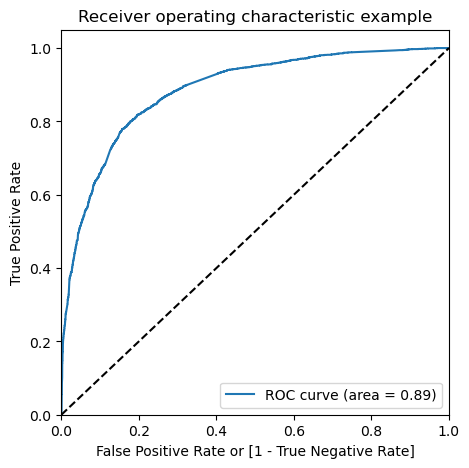

In [120]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

Area under ROC curve is 0.89 out of 1 which indicates a good predictive model.

####  Finding Optimal Cutoff Point

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

# Display the first few rows of the DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.195102   0          0    1    1    0    0    0    0   
1          0        0.299178   1          0    1    1    1    0    0    0   
2          1        0.275390   2          0    1    1    1    0    0    0   
3          0        0.865827   3          1    1    1    1    1    1    1   
4          0        0.057249   4          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    1    0  
4    0    0    0    0

In [122]:
# Calculate Accuracy, Sensitivity and Specificity for various probability cutoffs

# Initialize an empty DataFrame to store results for different probability cutoffs
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# Generate a list of probability cutoff values
numbers = [float(x)/10 for x in range(10)]

# Iterate through each probability cutoff value
for i in numbers:
     # Calculate confusion matrix
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    
    # Calculate total number of observations in the confusion matrix
    total1=sum(sum(cm1))
    
    # Calculate accuracy
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    # Calculate specificity
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    # Calculate sensitivity
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    # Store results in the DataFrame
    cutoff_df.loc[i] =[ i, Accuracy, Sensitivity, Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.382711     1.000000     0.000000
0.1          0.1  0.608631     0.970308     0.384396
0.2          0.2  0.762987     0.897490     0.679597
0.3          0.3  0.795860     0.838459     0.769450
0.4          0.4  0.816829     0.780134     0.839579
0.5          0.5  0.810200     0.673736     0.894806
0.6          0.6  0.800189     0.603393     0.922200
0.7          0.7  0.785714     0.522800     0.948718
0.8          0.8  0.760011     0.423471     0.968661
0.9          0.9  0.710633     0.260870     0.989481


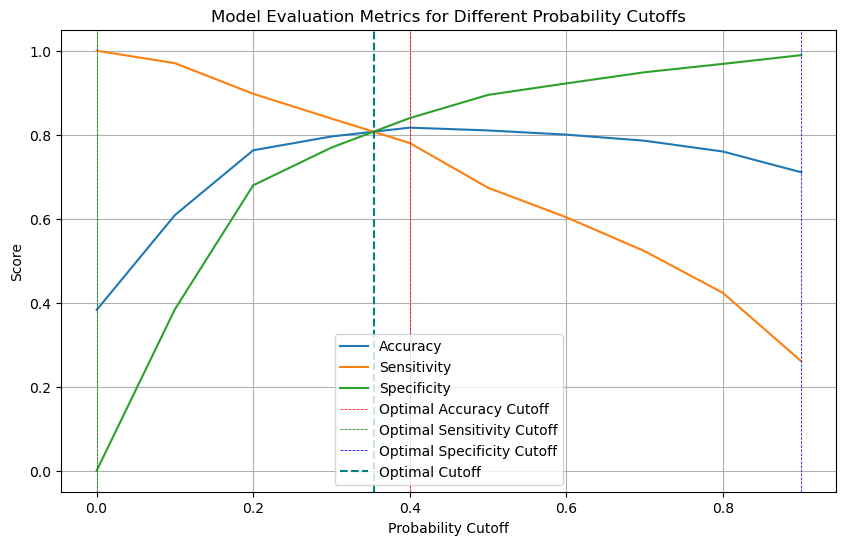

In [123]:
# Plot accuracy, sensitivity, and specificity for various probability cutoffs
plt.figure(figsize=(10, 6))
plt.plot(cutoff_df['Probability'], cutoff_df['Accuracy'], label='Accuracy')
plt.plot(cutoff_df['Probability'], cutoff_df['Sensitivity'], label='Sensitivity')
plt.plot(cutoff_df['Probability'], cutoff_df['Specificity'], label='Specificity')

# Mark the optimal cutoff point for each metric
optimal_accuracy_cutoff = cutoff_df[cutoff_df['Accuracy'] == cutoff_df['Accuracy'].max()]['Probability'].values[0]
optimal_sensitivity_cutoff = cutoff_df[cutoff_df['Sensitivity'] == cutoff_df['Sensitivity'].max()]['Probability'].values[0]
optimal_specificity_cutoff = cutoff_df[cutoff_df['Specificity'] == cutoff_df['Specificity'].max()]['Probability'].values[0]

plt.axvline(x=optimal_accuracy_cutoff, color='r', linestyle='--', linewidth=0.55, label='Optimal Accuracy Cutoff')
plt.axvline(x=optimal_sensitivity_cutoff, color='g', linestyle='--', linewidth=0.55, label='Optimal Sensitivity Cutoff')
plt.axvline(x=optimal_specificity_cutoff, color='b', linestyle='--', linewidth=0.55, label='Optimal Specificity Cutoff')
plt.axvline(x=0.354, color='teal', linestyle='--', label='Optimal Cutoff')

# Add labels and legend
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics for Different Probability Cutoffs')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

From the above curve 0.354 is the Optimum cutoff point for probability threshold.

In [124]:
# Assign predicted values based on Optimal Cutoff point threshold
y_train_pred_final['Cutoff_Prediction'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.354 else 0)

# Display the first few rows of the DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.195102   0          0    1    1    0    0    0    0   
1          0        0.299178   1          0    1    1    1    0    0    0   
2          1        0.275390   2          0    1    1    1    0    0    0   
3          0        0.865827   3          1    1    1    1    1    1    1   
4          0        0.057249   4          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  Cutoff_Prediction  
0    0    0    0    0                  0  
1    0    0    0    0                  0  
2    0    0    0    0                  0  
3    1    1    1    0                  1  
4    0    0    0    0                  0

In [125]:
# Deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis = 1, inplace = True) 

# Display the first few rows of the DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  ID  Predicted  Cutoff_Prediction
0          1        0.195102   0          0                  0
1          0        0.299178   1          0                  0
2          1        0.275390   2          0                  0
3          0        0.865827   3          1                  1
4          0        0.057249   4          0                  0

In [126]:
# Check the Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Cutoff_Prediction))

Accuracy: 0.8096590909090909


In [127]:
# Calculate confusion matrix
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Cutoff_Prediction)
print("Confusion matrix:\n", confusion_2)

Confusion matrix:
 [[3700  863]
 [ 544 2285]]


In [128]:
# Assigning values
TP = confusion_2[1,1] # True positive 
TN = confusion_2[0,0] # True negatives
FP = confusion_2[0,1] # False positives
FN = confusion_2[1,0] # False negatives

In [129]:
# Calculate Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity:", Sensitivity)

Sensitivity: 0.807705903145988


In [130]:
# Calculate Specificity 
Specificity  = TN / float(TN+FP)
print("Specificity:", Specificity)

Specificity: 0.8108700416392725


In [131]:
# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate:", FP/ float(TN+FP))

False Postive Rate: 0.1891299583607276


In [132]:
# Positive predictive value 
print ("Positive Predictive Value:", TP / float(TP+FP))

Positive Predictive Value: 0.7258576874205845


In [133]:
# Negative predictive value
print ("Negative Predictive Value:", TN / float(TN+ FN))

Negative Predictive Value: 0.8718190386427899


In [134]:
# Recall value
print("Recall:", TP / float(TP+FN))

Recall: 0.807705903145988


In [135]:
# F1_score value
f1 = f1_score(y_train_pred_final.Converted, y_train_pred_final.Cutoff_Prediction, average=None)

# Print F1 score
print("F1 Score:", f1)

F1 Score: [0.84024072 0.76459762]


### Precision and recall tradeoff

In [136]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['Cutoff_Prediction']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

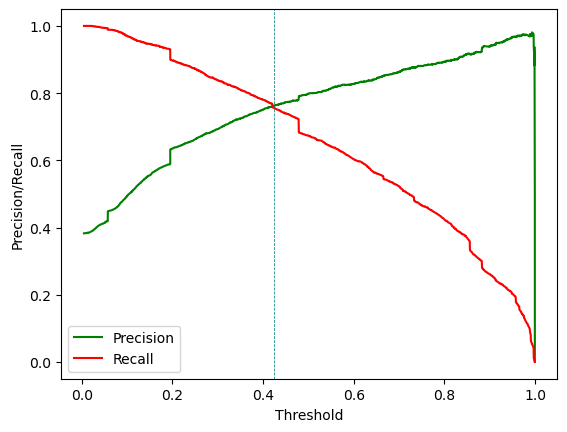

In [137]:
# Plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# Add a vertical line at the optimal threshold
plt.axvline(x=0.425, color='teal',linewidth = 0.55, linestyle='--')

# Add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

# Displaying the graph
plt.show()

The intersection point of the curve is at 0.425 approx. Hence, probability thershold is aprrox 0.425 from above the curve

In [138]:
# Copying dataframe of test model evaluation with precision recall threshold of 0.425
y_train_precision_recall = y_train_pred_final.copy()

In [139]:
# Assigning a feature for 0.425 cutoff from precision recall curve
y_train_precision_recall['Recall_Prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.425 else 0)

# Display the first few rows of the DataFrame
y_train_precision_recall.head()

Converted  Converted_Prob  ID  Predicted  Cutoff_Prediction  \
0          1        0.195102   0          0                  0   
1          0        0.299178   1          0                  0   
2          1        0.275390   2          0                  0   
3          0        0.865827   3          1                  1   
4          0        0.057249   4          0                  0   

   Recall_Prediction  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0

In [140]:
# Check the Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_precision_recall.Converted, y_train_precision_recall.Recall_Prediction))

Accuracy: 0.8164231601731602


In [141]:
# Calculate confusion matrix
confusion_3 = metrics.confusion_matrix(y_train_precision_recall.Converted, y_train_precision_recall.Recall_Prediction)
print("Confusion matrix:\n", confusion_3)

Confusion matrix:
 [[3898  665]
 [ 692 2137]]


In [142]:
# Assigning values
TP = confusion_3[1,1] # True positive 
TN = confusion_3[0,0] # True negatives
FP = confusion_3[0,1] # False positives
FN = confusion_3[1,0] # False negatives

In [143]:
# Calculate Sensitivity
Sensitivity = TP / float(TP + FN)
print("Sensitivity:", Sensitivity)

Sensitivity: 0.7553905973842348


In [144]:
# Calculate Specificity 
Specificity  = TN / float(TN + FP)
print("Specificity:", Specificity)

Specificity: 0.8542625465702389


In [145]:
# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate:", FP / float(TN+FP))

False Postive Rate: 0.14573745342976113


In [146]:
# Positive predictive value 
print ("Positive Predictive Value:", TP / float(TP+FP))

Positive Predictive Value: 0.7626695217701641


In [147]:
# Negative predictive value
print ("Negative Predictive Value:", TN / float(TN+ FN))

Negative Predictive Value: 0.8492374727668845


In [148]:
# Recall value
print("Recall:", TP / float(TP+FN))

Recall: 0.7553905973842348


In [149]:
# F1_score value
f1 = f1_score(y_train_precision_recall.Converted, y_train_precision_recall.Recall_Prediction, average=None)

# Print F1 score
print("F1 Score:", f1)

F1 Score: [0.8517426  0.75901261]


After applying a precision-recall threshold of 0.425, we observed a slight increase in accuracy, but the sensitivity dropped to 76.10%, below the 80% limit specified in the business requirements. Additionally, there were decreases in specificity and recall values. As one of the parameters fell below the 80% threshold, the precision-recall threshold is deemed unsuitable. Therefore, we opt to use the optimal cutoff threshold value of 0.345 instead of 0.425.

#### Adding 'Lead Score' Feature to Training DataFrame

In [150]:
# Renaming and Mapping Converted_Prob to Lead_Score
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))

# Display the first few rows of the DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  ID  Predicted  Cutoff_Prediction  Lead_Score
0          1        0.195102   0          0                  0          20
1          0        0.299178   1          0                  0          30
2          1        0.275390   2          0                  0          28
3          0        0.865827   3          1                  1          87
4          0        0.057249   4          0                  0           6

### PREDICTIONS ON TEST SET

In [151]:
# Display the first few rows of the DataFrame
X_test_scaled.head()

TotalVisits  Time Spent  Page Views Per Visit  \
0     0.727273    0.444982              1.000000   
1     0.000000    0.000000              0.000000   
2     0.454545    0.025968              0.833333   
3     0.000000    0.000000              0.000000   
4     0.000000    0.000000              0.000000   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                  0.0                        0.0   
1                                  0.0                        1.0   
2                                  0.0                        0.0   
3                                  0.0                        0.0   
4                                  0.0                        1.0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                         1.0                   0.0                 0.0   
1                         0.0                   0.0                 0.0   
2                         0.0                   0.0                 1.0   
3                         0.0                   0.0                 0.0   
4                         0.0                   0.0                 0.0   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                    0.0                 0.0                     0.0   
1                    0.0                 0.0                     0.0   
2                    0.0                 0.0                     0.0   
3                    0.0                 0.0                     1.0   
4                    0.0                 0.0                     0.0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                        0.0                    0.0   
1                        0.0                    1.0   
2                        0.0                    0.0   
3                        0.0                    0.0   
4                        0.0                    1.0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                         0.0                       0.0                  0.0   
1                         0.0                       0.0                  0.0   
2                         0.0                       0.0                  0.0   
3                         0.0                       0.0                  0.0   
4                         0.0                       0.0                  0.0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                           0.0               0.0               0.0   
1                           0.0               0.0               0.0   
2                           0.0               0.0               0.0   
3                           0.0               0.0               0.0   
4                           0.0               0.0               0.0   

   Lead Source_testone  Lead Source_welearnblog_Home  \
0                  0.0                           0.0   
1                  0.0                           0.0   
2                  0.0                           0.0   
3                  0.0                           0.0   
4                  0.0                           0.0   

   Lead Source_youtubechannel  Do Not Email_1  \
0                         0.0   

In [152]:
# Display information about the X scaled test dataset
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   TotalVisits                                 1848 non-null   float64
 1   Time Spent                                  1848 non-null   float64
 2   Page Views Per Visit                        1848 non-null   float64
 3   Lead Origin_Landing Page Submission         1848 non-null   float64
 4   Lead Origin_Lead Add Form                   1848 non-null   float64
 5   Lead Origin_Lead Import                     1848 non-null   float64
 6   Lead Origin_Quick Add Form                  1848 non-null   float64
 7   Lead Source_Direct Traffic                  1848 non-null   float64
 8   Lead Source_Facebook                        1848 non-null   float64
 9   Lead Source_Google                          1848 non-null   float64
 10  Lead Source_

In [153]:
# # Selecting the columns required for prediction based on the features selected by RFE
X_test = X_test_scaled[rfe_col]

# Displaying the first few rows of the transformed test data
X_test.head()

TotalVisits  Time Spent  Page Views Per Visit  \
0     0.727273    0.444982              1.000000   
1     0.000000    0.000000              0.000000   
2     0.454545    0.025968              0.833333   
3     0.000000    0.000000              0.000000   
4     0.000000    0.000000              0.000000   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                  0.0                        0.0   
1                                  0.0                        1.0   
2                                  0.0                        0.0   
3                                  0.0                        0.0   
4                                  0.0                        1.0   

   Lead Source_Olark Chat  Lead Source_Welingak Website  Do Not Email_1  \
0                     0.0                           0.0             0.0   
1                     0.0                           0.0             0.0   
2                     0.0                           0.0             0.0   
3                     1.0                           0.0             0.0   
4                     0.0                           0.0             0.0   

   Last Activity_Converted to Lead  Last Activity_Had a Phone Conversation  \
0                              0.0                                     0.0   
1                              0.0                                     0.0   
2                              0.0                                     0.0   
3                              0.0                                     0.0   
4                              0.0                                     0.0   

   Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
0                                    0.0                     1.0   
1                                    0.0                     1.0   
2                                    0.0                     0.0   
3                                    1.0                     0.0   
4                                    0.0                     0.0   

   Specialization_Others  Current Occupation_Housewife  \
0                    1.0                           0.0   
1                    1.0                           0.0   
2                    0.0                           0.0   
3                    1.0                           0.0   
4                    0.0                           0.0   

   Current Occupation_Working Professional  
0                                      0.0  
1                                      0.0  
2                                      1.0  
3                                      0.0  
4                                      0.0

In [154]:
# Checking the shape of the test dataframe
X_test.shape

(1848, 15)

In [155]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)

# Checking the shape of the X_test dataframe
X_test_sm.shape

(1848, 16)

In [156]:
# Dropping the column 'CurrentOccupation_Housewife' from X_test dataframe
X_test_sm=X_test_sm.drop(["Current Occupation_Housewife"],axis=1)

In [157]:
# Checking the shape of the X_test dataframe
X_test_sm.shape

(1848, 15)

In [158]:
# Making prediction using Final model
y_test_pred = Model_2.predict(X_test_sm)

In [159]:
# Top 10 columns
y_test_pred[:10]

0    0.672621
1    0.882542
2    0.759576
3    0.057249
4    0.855986
5    0.459235
6    0.344651
7    0.136324
8    0.049648
9    0.295385
dtype: float64

In [160]:
# Creating dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)

# Displaying the first few rows
y_test_pred.head()

0
0  0.672621
1  0.882542
2  0.759576
3  0.057249
4  0.855986

In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Display the first few rows of the DataFrame
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [162]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_test_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_test_pred_final.head()

Converted    ID         0
0          1  4269  0.672621
1          1  2376  0.882542
2          1  7766  0.759576
3          0  9199  0.057249
4          1  4359  0.855986

In [163]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['ID','Converted','Converted_Prob'], axis=1)

# Display the first few rows of the DataFrame
y_test_pred_final.head()

ID  Converted  Converted_Prob
0  4269          1        0.672621
1  2376          1        0.882542
2  7766          1        0.759576
3  9199          0        0.057249
4  4359          1        0.855986

In [164]:
# Taking sensitivity-specificity method at 0.345 probability cutoff during training
y_test_pred_final['Final_Prediction'] = y_test_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)

# Display the first few rows of the DataFrame
y_test_pred_final.head()

ID  Converted  Converted_Prob  Final_Prediction
0  4269          1        0.672621                 1
1  2376          1        0.882542                 1
2  7766          1        0.759576                 1
3  9199          0        0.057249                 0
4  4359          1        0.855986                 1

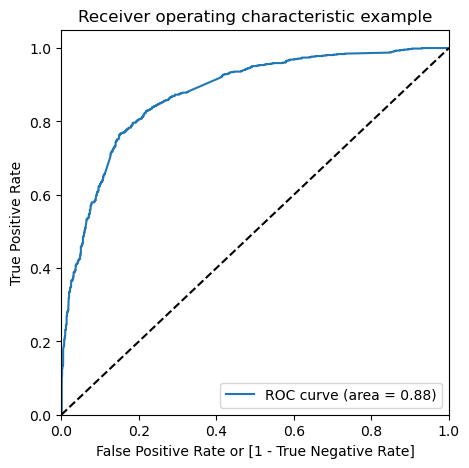

In [165]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final["Converted"], y_test_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_test_pred_final["Converted"], y_test_pred_final["Converted_Prob"])

Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

## TEST MODEL EVALUATION

In [166]:
# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Prediction'])

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.8024891774891775


In [167]:
# Calculate confusion matrix
confusion_test = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Final_Prediction'])
print("Confusion matrix:\n", confusion_test)

Confusion matrix:
 [[896 220]
 [145 587]]


In [168]:
# Assigning values
TP = confusion_test[1,1] # True positive 
TN = confusion_test[0,0] # True negatives
FP = confusion_test[0,1] # False positives
FN = confusion_test[1,0] # False negatives

In [169]:
# Calculate Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity:", Sensitivity)

Sensitivity: 0.8019125683060109


In [170]:
# Calculate Specificity 
Specificity  = TN / float(TN+FP)
print("Specificity:", Specificity)

Specificity: 0.8028673835125448


In [171]:
# Calculate false postive rate - predicting conversion when customer does not have conversion
print("False Postive Rate:", FP/ float(TN+FP))

False Postive Rate: 0.1971326164874552


In [172]:
# Positive predictive value 
print ("Positive Predictive Value:",TP / float(TP+FP))

Positive Predictive Value: 0.7273853779429987


In [173]:
# Negative predictive value
print ("Negative Predictive Value:",TN / float(TN+ FN))

Negative Predictive Value: 0.8607108549471661


In [174]:
# Recall value
print("Recall:", TP / float(TP+FN))

Recall: 0.8019125683060109


In [175]:
# F1_score value
f1 = f1_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Prediction'], average=None)

# Print F1 score
print("F1 Score:", f1)

F1 Score: [0.8307835  0.76283301]


### Adding Lead Score Feature

In [176]:
# Lets add Lead Score 
y_test_pred_final['Lead_Score'] = y_test_pred_final['Converted_Prob'].map( lambda x: round(x*100))

# Display the first few rows of the DataFrame
y_test_pred_final.head()

ID  Converted  Converted_Prob  Final_Prediction  Lead_Score
0  4269          1        0.672621                 1          67
1  2376          1        0.882542                 1          88
2  7766          1        0.759576                 1          76
3  9199          0        0.057249                 0           6
4  4359          1        0.855986                 1          86

In [177]:
# Features and their coefficicent from final model
parameters = Model_2.params.sort_values(ascending=False)
parameters

Time Spent                                 4.475835
Lead Origin_Lead Add Form                  3.113649
Current Occupation_Working Professional    2.672919
Lead Source_Welingak Website               2.640200
Last Activity_Had a Phone Conversation     2.195979
Last Activity_SMS Sent                     1.330679
TotalVisits                                1.068644
Lead Source_Olark Chat                     1.010407
Page Views Per Visit                      -0.951878
Lead Origin_Landing Page Submission       -0.999454
Specialization_Others                     -1.096296
Last Activity_Converted to Lead           -1.114313
const                                     -1.331306
Last Activity_Olark Chat Conversation     -1.384195
Do Not Email_1                            -1.486583
dtype: float64

## CONCLUSION

- The logistic regression model is used to predict the probabilty of conversion of a customer. 
- The final model is based on 14 features.

#### Top 3 features/variables from the final model:
- TimeSpent
- Lead Origin_Lead Add Form
- Current Occupation_Working Professional

#### TRAIN SET RESULT:

- Accuracy: 80.96% ≈ 81%
- Sensitivity: 80.77%
- Specificity: 81.08%

#### TEST SET RESULT:

- Accuracy: 80.25%
- Sensitivity: 80.28%
- Specificity: 80.19%

### RECOMMEDATIONS

- Among the factors influencing lead conversion, TotalVisits, TimeSpent, and Current Occupation_Working Professional stand out as significant contributors.
- Targeting Working Professionals appears promising due to their higher likelihood of engaging with upskilling opportunities.
- Leveraging phone conversations or text messages could enhance customer conversion rates.
- A notable portion of website visitors does not convert into leads.
- Additionally, individuals associated with the last Activity_Olark Chat Conversation exhibit a lower likelihood of conversion.